In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import kagglehub
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
import xgboost as xgb
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler


# Optional: configure plotting style
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (8, 5)

In [2]:
# Download latest version
path = kagglehub.dataset_download("blastchar/telco-customer-churn")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'telco-customer-churn' dataset.
Path to dataset files: /kaggle/input/telco-customer-churn


In [3]:
df = pd.read_csv(f"{path}/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df.iloc[1]

,1
customerID,5575-GNVDE
gender,Male
SeniorCitizen,0
Partner,No
Dependents,No
tenure,34
PhoneService,Yes
MultipleLines,No
InternetService,DSL
OnlineSecurity,Yes


TARGET VARIABLE ANALYSIS
Churn
No     5174
Yes    1869
Name: count, dtype: int64

Churn Rate: 26.54%


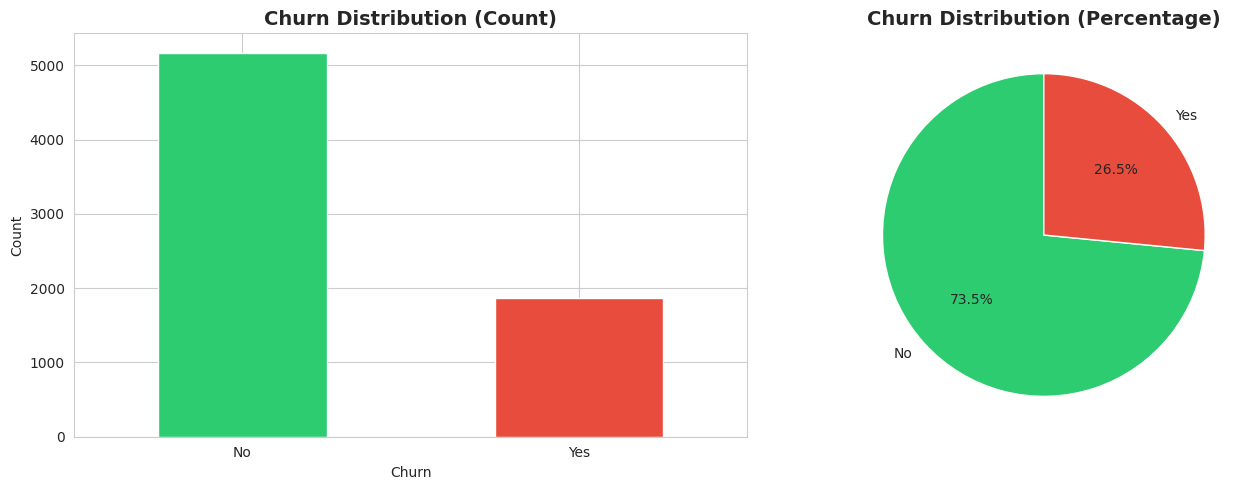

In [6]:
print("="*60)
print("TARGET VARIABLE ANALYSIS")
print("="*60)
print(df['Churn'].value_counts())
print(f"\nChurn Rate: {df['Churn'].value_counts(normalize=True)['Yes']*100:.2f}%")

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Count plot
df['Churn'].value_counts().plot(kind='bar', ax=axes[0], color=['#2ecc71', '#e74c3c'])
axes[0].set_title('Churn Distribution (Count)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Churn')
axes[0].set_ylabel('Count')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=0)

# Pie chart
churn_counts = df['Churn'].value_counts()
axes[1].pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', 
           colors=['#2ecc71', '#e74c3c'], startangle=90)
axes[1].set_title('Churn Distribution (Percentage)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

NUMERICAL FEATURES DISTRIBUTION


/tmp/ipython-input-1325240605.py:31: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[idx, 2].boxplot([churn_no, churn_yes], labels=['No Churn', 'Churn'])
/tmp/ipython-input-1325240605.py:31: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[idx, 2].boxplot([churn_no, churn_yes], labels=['No Churn', 'Churn'])
/tmp/ipython-input-1325240605.py:31: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[idx, 2].boxplot([churn_no, churn_yes], labels=['No Churn', 'Churn'])


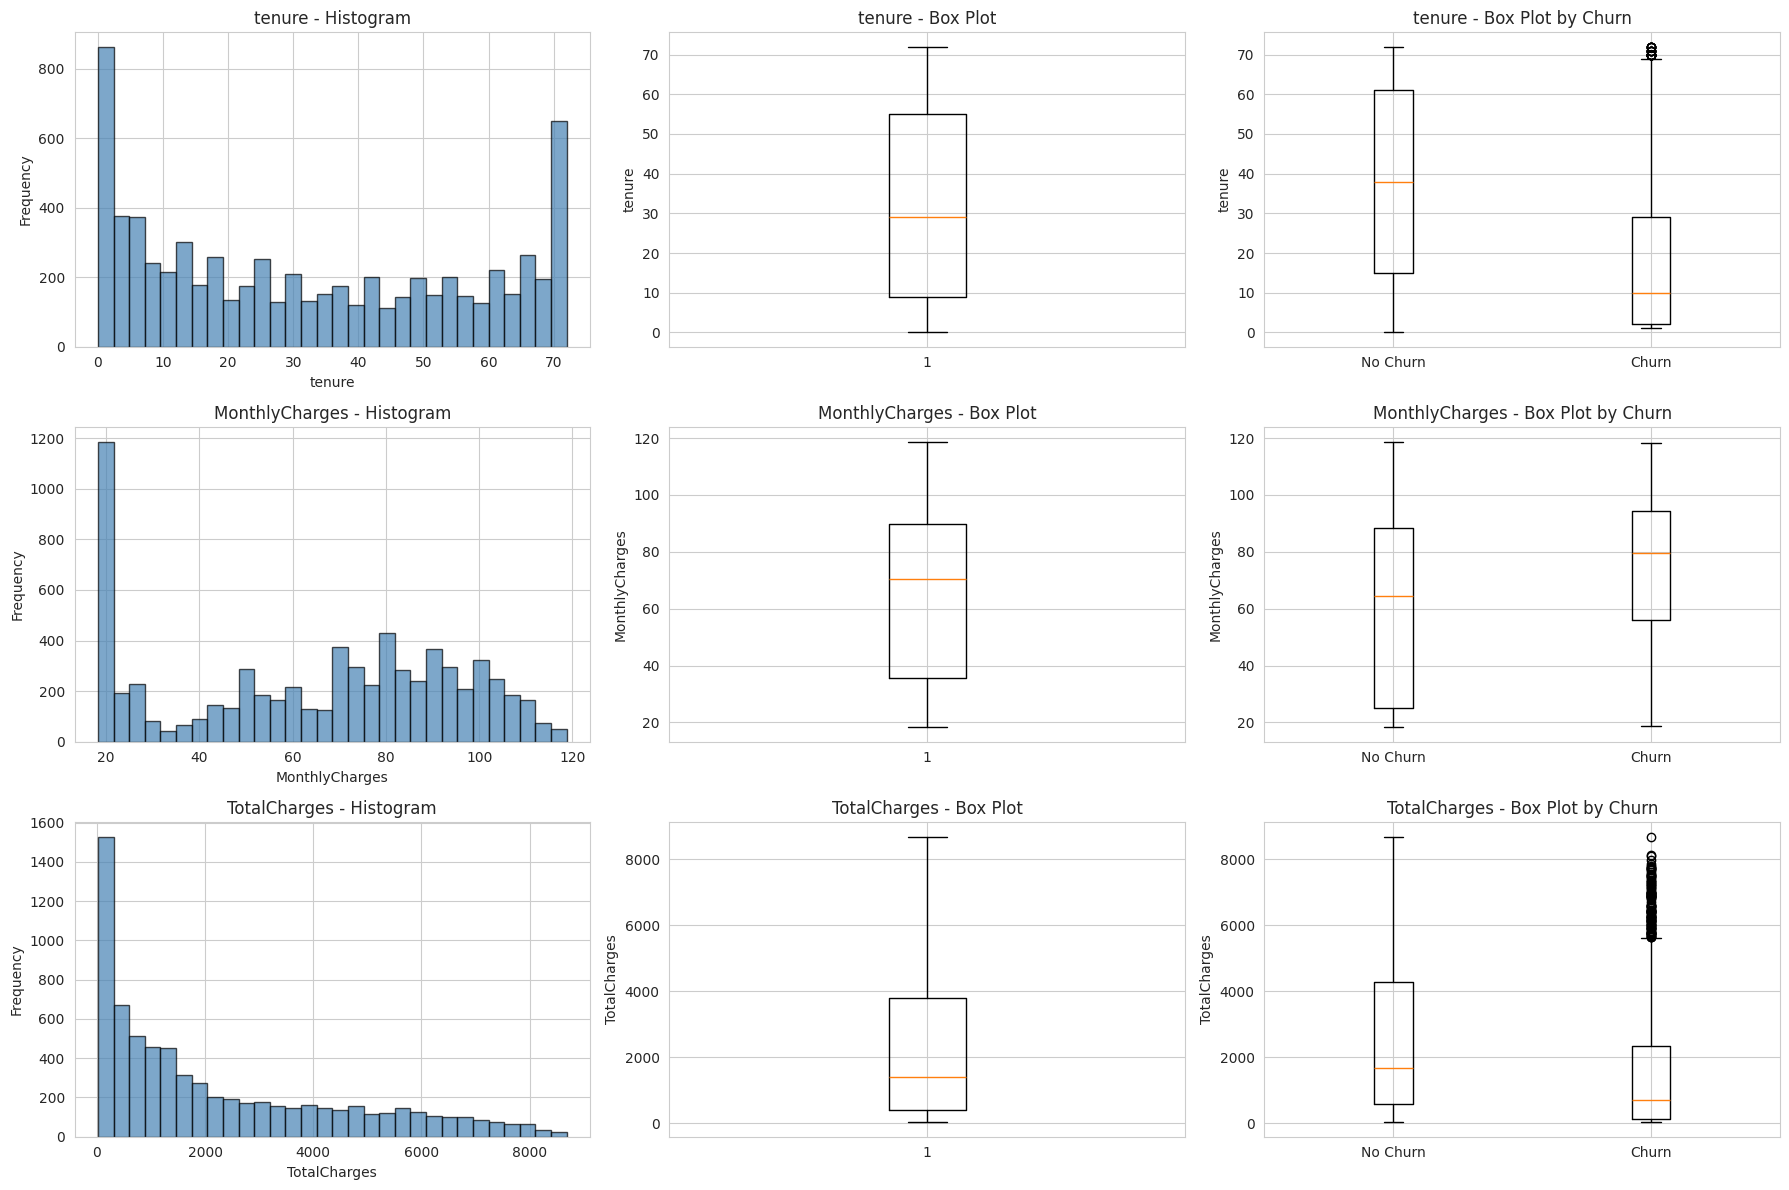


Numerical Features Statistics:
            tenure  MonthlyCharges  TotalCharges
count  7043.000000     7043.000000   7032.000000
mean     32.371149       64.761692   2283.300441
std      24.559481       30.090047   2266.771362
min       0.000000       18.250000     18.800000
25%       9.000000       35.500000    401.450000
50%      29.000000       70.350000   1397.475000
75%      55.000000       89.850000   3794.737500
max      72.000000      118.750000   8684.800000


In [12]:
print("="*60)
print("NUMERICAL FEATURES DISTRIBUTION")
print("="*60)

numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

fig, axes = plt.subplots(3, 3, figsize=(18, 12))

for idx, col in enumerate(numerical_cols):
    # Convert TotalCharges to numeric if needed
    if col == 'TotalCharges':
        df_temp = df.copy()
        df_temp[col] = pd.to_numeric(df_temp[col], errors='coerce')
    else:
        df_temp = df
    
    # Histogram
    axes[idx, 0].hist(df_temp[col].dropna(), bins=30, color='steelblue', edgecolor='black', alpha=0.7)
    axes[idx, 0].set_title(f'{col} - Histogram')
    axes[idx, 0].set_xlabel(col)
    axes[idx, 0].set_ylabel('Frequency')
    
    # Box plot
    axes[idx, 1].boxplot(df_temp[col].dropna(), vert=True)
    axes[idx, 1].set_title(f'{col} - Box Plot')
    axes[idx, 1].set_ylabel(col)
    
    # Box plot by Churn
    churn_yes = df_temp[df_temp['Churn'] == 'Yes'][col].dropna()
    churn_no = df_temp[df_temp['Churn'] == 'No'][col].dropna()
    axes[idx, 2].boxplot([churn_no, churn_yes], labels=['No Churn', 'Churn'])
    axes[idx, 2].set_title(f'{col} - Box Plot by Churn')
    axes[idx, 2].set_ylabel(col)

plt.tight_layout()
plt.show()

# Statistics
print("\nNumerical Features Statistics:")
df_temp = df.copy()
df_temp['TotalCharges'] = pd.to_numeric(df_temp['TotalCharges'], errors='coerce')
print(df_temp[numerical_cols].describe())

OUTLIER DETECTION (IQR METHOD)

tenure:
  Q1: 9.00, Q3: 55.00, IQR: 46.00
  Lower Bound: -60.00, Upper Bound: 124.00
  Number of outliers: 0 (0.00%)

MonthlyCharges:
  Q1: 35.50, Q3: 89.85, IQR: 54.35
  Lower Bound: -46.02, Upper Bound: 171.38
  Number of outliers: 0 (0.00%)

TotalCharges:
  Q1: 401.45, Q3: 3794.74, IQR: 3393.29
  Lower Bound: -4688.48, Upper Bound: 8884.67
  Number of outliers: 0 (0.00%)


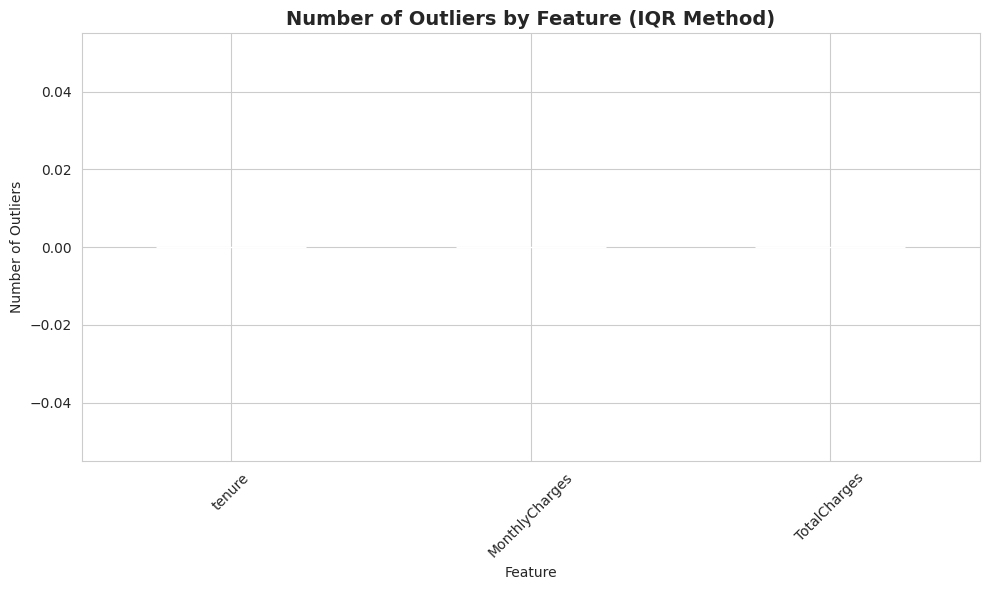

In [13]:
# Outlier Detection using IQR Method
print("="*60)
print("OUTLIER DETECTION (IQR METHOD)")
print("="*60)

df_temp = df.copy()
df_temp['TotalCharges'] = pd.to_numeric(df_temp['TotalCharges'], errors='coerce')

outlier_counts = {}

for col in numerical_cols:
    Q1 = df_temp[col].quantile(0.25)
    Q3 = df_temp[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df_temp[(df_temp[col] < lower_bound) | (df_temp[col] > upper_bound)][col]
    outlier_counts[col] = len(outliers)
    
    print(f"\n{col}:")
    print(f"  Q1: {Q1:.2f}, Q3: {Q3:.2f}, IQR: {IQR:.2f}")
    print(f"  Lower Bound: {lower_bound:.2f}, Upper Bound: {upper_bound:.2f}")
    print(f"  Number of outliers: {len(outliers)} ({len(outliers)/len(df_temp)*100:.2f}%)")

# Visualize outlier counts
fig, ax = plt.subplots(figsize=(10, 6))
pd.Series(outlier_counts).plot(kind='bar', ax=ax, color='coral')
ax.set_title('Number of Outliers by Feature (IQR Method)', fontsize=14, fontweight='bold')
ax.set_ylabel('Number of Outliers')
ax.set_xlabel('Feature')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.tight_layout()
plt.show()

CHURN RATE BY CATEGORICAL FEATURES

gender:
gender
Female    26.920872
Male      26.160338
Name: Churn, dtype: float64

SeniorCitizen:
SeniorCitizen
1    41.681261
0    23.606168
Name: Churn, dtype: float64

Partner:
Partner
No     32.957979
Yes    19.664903
Name: Churn, dtype: float64

Dependents:
Dependents
No     31.279140
Yes    15.450237
Name: Churn, dtype: float64

PhoneService:
PhoneService
Yes    26.709637
No     24.926686
Name: Churn, dtype: float64

MultipleLines:
MultipleLines
Yes                 28.609896
No                  25.044248
No phone service    24.926686
Name: Churn, dtype: float64

InternetService:
InternetService
Fiber optic    41.892765
DSL            18.959108
No              7.404980
Name: Churn, dtype: float64

OnlineSecurity:
OnlineSecurity
No                     41.766724
Yes                    14.611194
No internet service     7.404980
Name: Churn, dtype: float64

OnlineBackup:
OnlineBackup
No                     39.928756
Yes                    21.531494

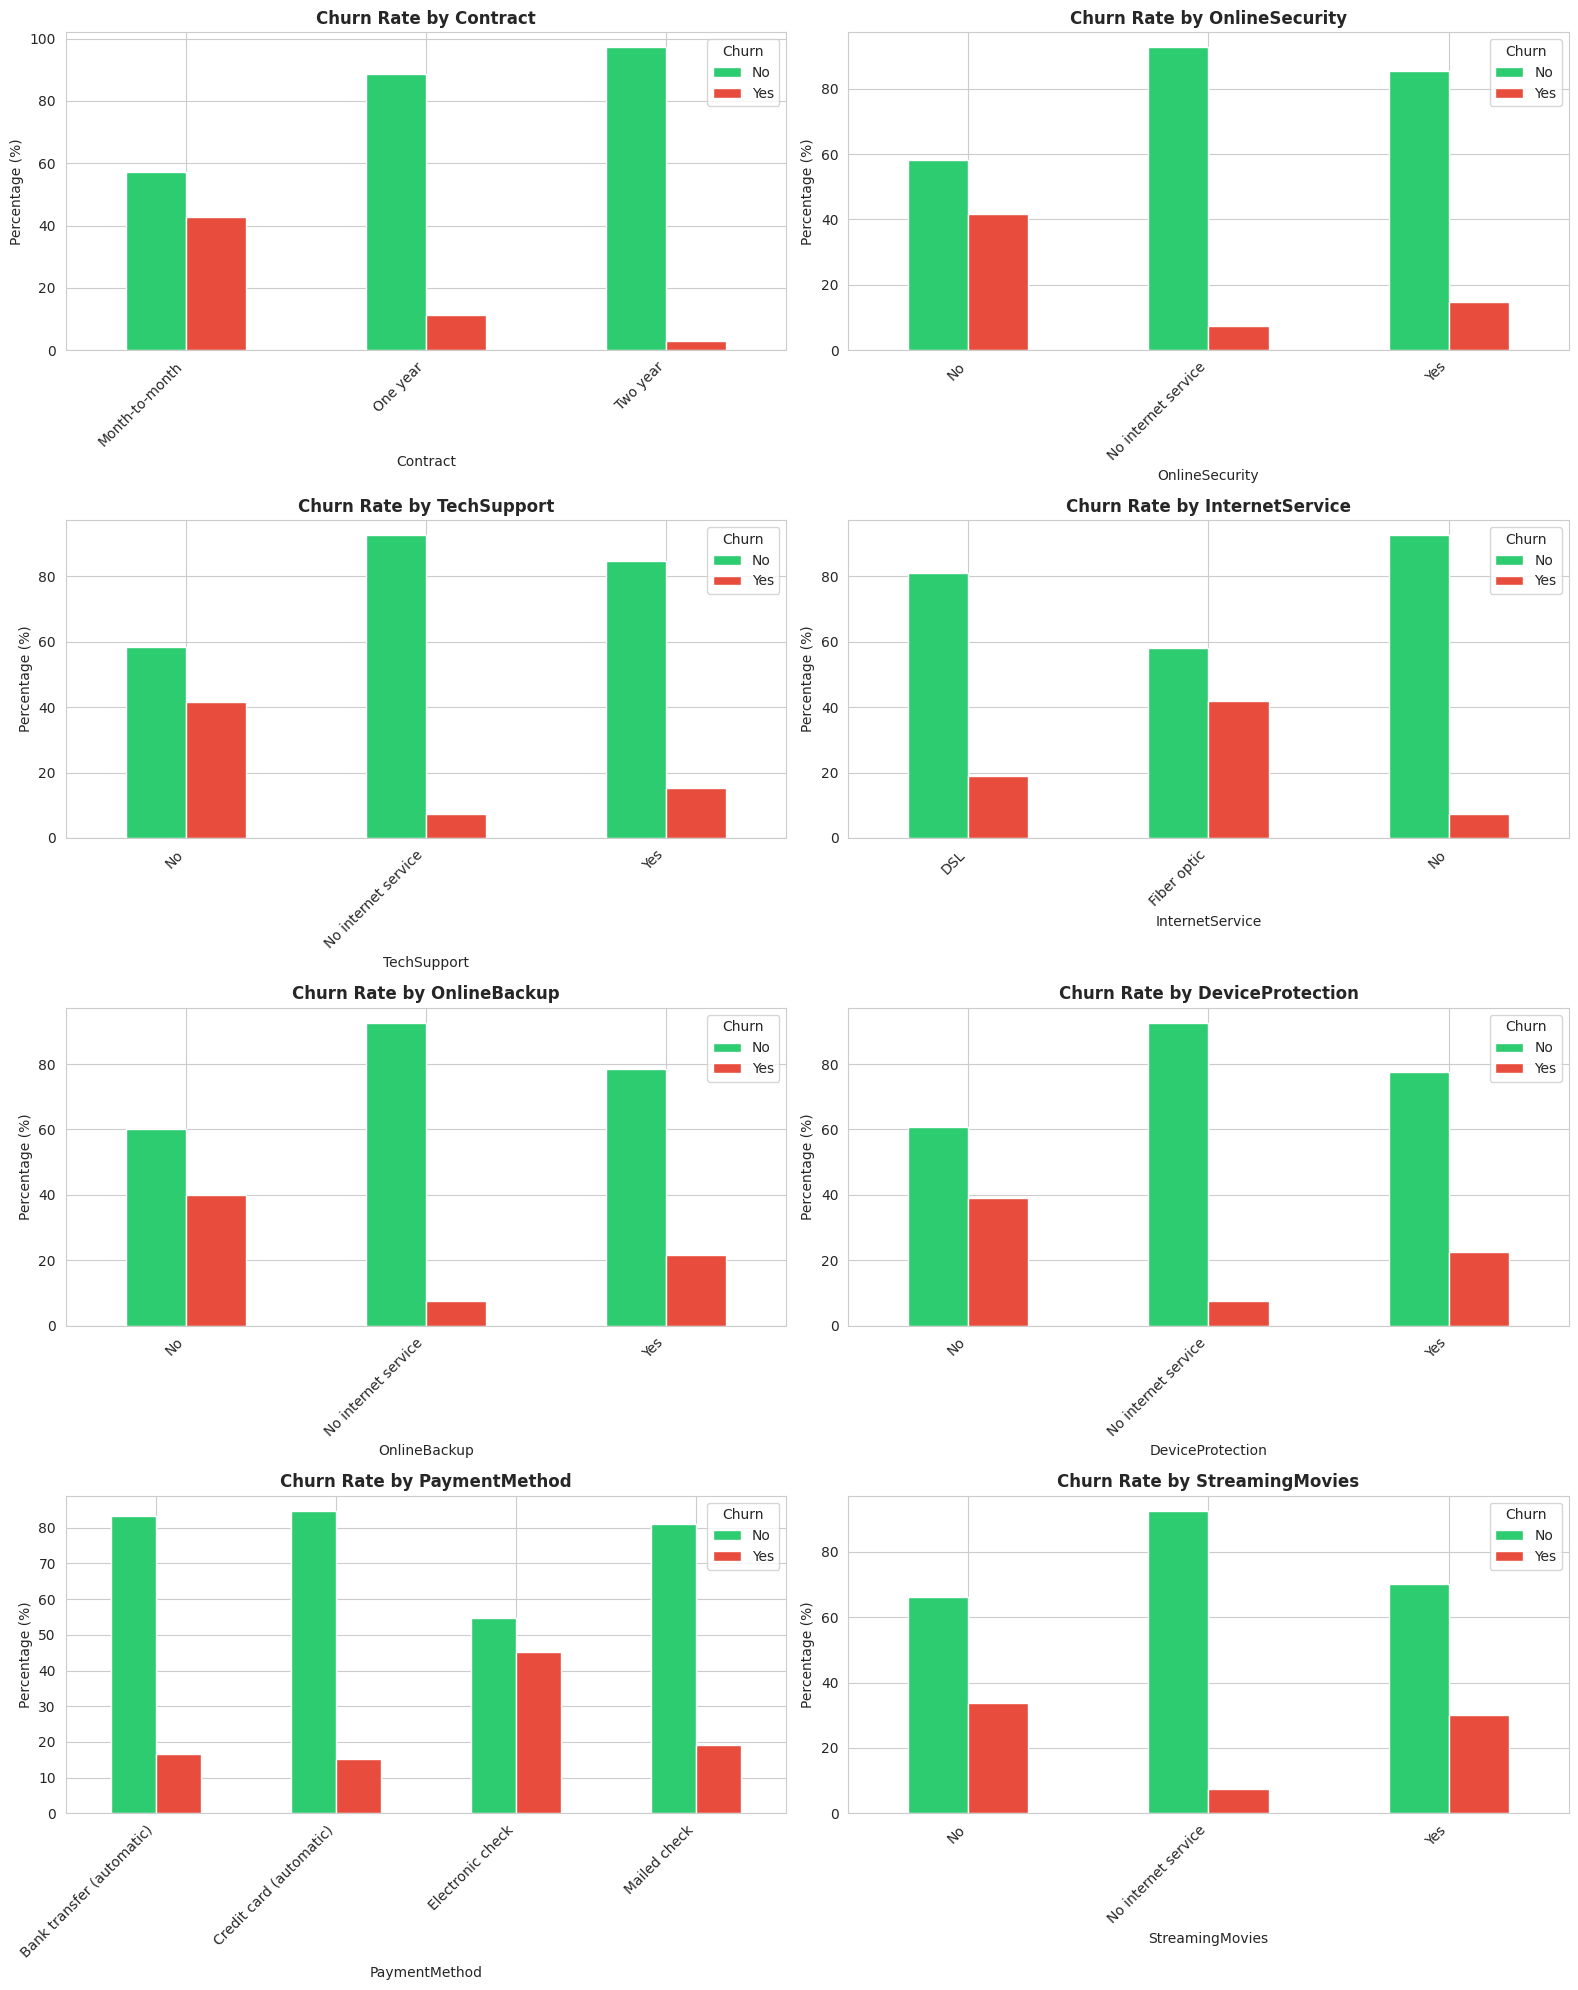

In [14]:
# Churn Rate by Categorical Features
print("="*60)
print("CHURN RATE BY CATEGORICAL FEATURES")
print("="*60)

categorical_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 
                   'PhoneService', 'MultipleLines', 'InternetService',
                   'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                   'TechSupport', 'StreamingTV', 'StreamingMovies',
                   'Contract', 'PaperlessBilling', 'PaymentMethod']

# Calculate churn rate for each category
churn_rates = {}
for col in categorical_cols:
    churn_rate = df.groupby(col)['Churn'].apply(lambda x: (x == 'Yes').sum() / len(x) * 100)
    churn_rates[col] = churn_rate
    print(f"\n{col}:")
    print(churn_rate.sort_values(ascending=False))

# Visualize top features with highest churn variance
print("\n" + "="*60)
print("TOP FEATURES BY CHURN RATE VARIANCE")
print("="*60)

# Calculate variance in churn rates for each feature
churn_variances = {col: rates.var() for col, rates in churn_rates.items()}
top_features = sorted(churn_variances.items(), key=lambda x: x[1], reverse=True)[:8]

fig, axes = plt.subplots(4, 2, figsize=(16, 20))
axes = axes.ravel()

for idx, (col, _) in enumerate(top_features):
    churn_by_cat = df.groupby([col, 'Churn']).size().unstack(fill_value=0)
    churn_pct = churn_by_cat.div(churn_by_cat.sum(axis=1), axis=0) * 100
    
    churn_pct.plot(kind='bar', ax=axes[idx], color=['#2ecc71', '#e74c3c'])
    axes[idx].set_title(f'Churn Rate by {col}', fontsize=12, fontweight='bold')
    axes[idx].set_ylabel('Percentage (%)')
    axes[idx].set_xlabel(col)
    axes[idx].legend(title='Churn', labels=['No', 'Yes'])
    axes[idx].set_xticklabels(axes[idx].get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()

CORRELATION WITH CHURN
MonthlyCharges    0.193356
TotalCharges     -0.199484
tenure           -0.352229
Name: Churn_encoded, dtype: float64


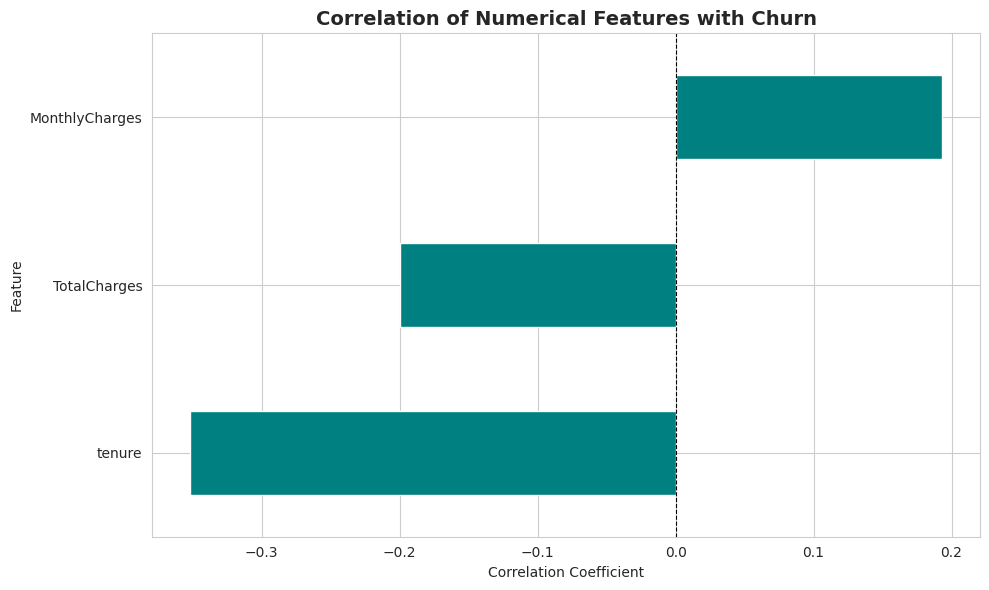

In [15]:
# Correlation with Churn (Numerical Features)
print("="*60)
print("CORRELATION WITH CHURN")
print("="*60)

# Create temporary dataframe with numerical features and encoded churn
df_corr = df.copy()
df_corr['TotalCharges'] = pd.to_numeric(df_corr['TotalCharges'], errors='coerce')
df_corr['Churn_encoded'] = (df_corr['Churn'] == 'Yes').astype(int)

# Calculate correlations
correlations = df_corr[numerical_cols + ['Churn_encoded']].corr()['Churn_encoded'].drop('Churn_encoded')
print(correlations.sort_values(ascending=False))

# Visualize
fig, ax = plt.subplots(figsize=(10, 6))
correlations.sort_values().plot(kind='barh', ax=ax, color='teal')
ax.set_title('Correlation of Numerical Features with Churn', fontsize=14, fontweight='bold')
ax.set_xlabel('Correlation Coefficient')
ax.set_ylabel('Feature')
ax.axvline(x=0, color='black', linestyle='--', linewidth=0.8)
plt.tight_layout()
plt.show()

PAIRPLOT: NUMERICAL FEATURES BY CHURN
Plotting sample of 2000 rows (total: 7032)


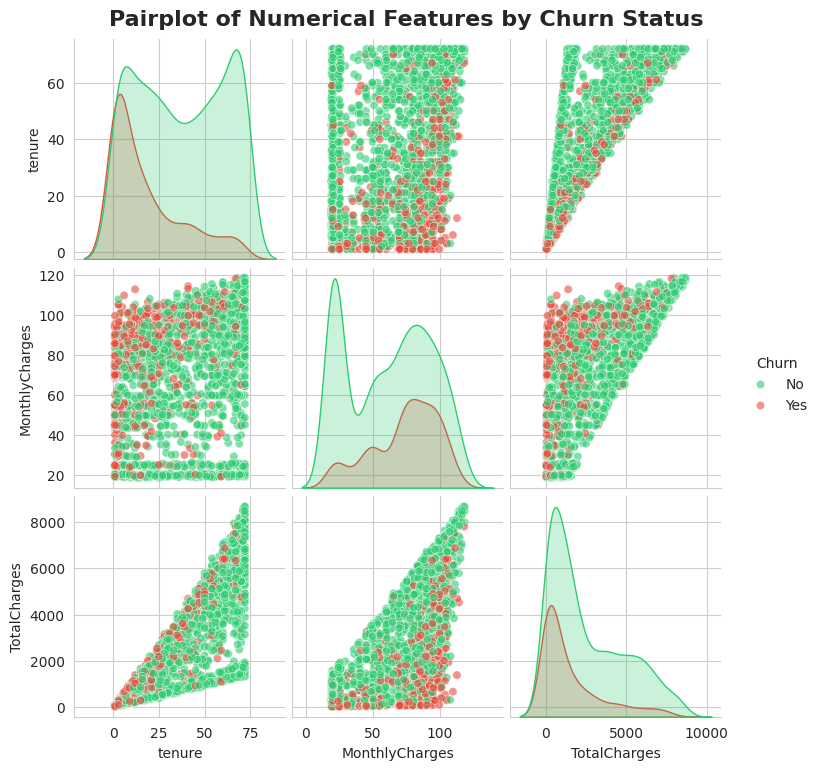

In [16]:
#  Pairplot for Numerical Features (Colored by Churn)
print("="*60)
print("PAIRPLOT: NUMERICAL FEATURES BY CHURN")
print("="*60)

df_pair = df.copy()
df_pair['TotalCharges'] = pd.to_numeric(df_pair['TotalCharges'], errors='coerce')
df_pair = df_pair.dropna(subset=['TotalCharges'])

# Sample if dataset is large
if len(df_pair) > 2000:
    df_pair_sample = df_pair.sample(2000, random_state=42)
    print(f"Plotting sample of 2000 rows (total: {len(df_pair)})")
else:
    df_pair_sample = df_pair

import seaborn as sns
pairplot = sns.pairplot(df_pair_sample[numerical_cols + ['Churn']], 
                        hue='Churn', 
                        palette={'No': '#2ecc71', 'Yes': '#e74c3c'},
                        diag_kind='kde',
                        plot_kws={'alpha': 0.6})
pairplot.fig.suptitle('Pairplot of Numerical Features by Churn Status', y=1.02, fontsize=16, fontweight='bold')
plt.show()

SUMMARY STATISTICS BY CHURN STATUS

No Churn:
            tenure  MonthlyCharges  TotalCharges
count  5174.000000     5174.000000   5163.000000
mean     37.569965       61.265124   2555.344141
std      24.113777       31.092648   2329.456984
min       0.000000       18.250000     18.800000
25%      15.000000       25.100000    577.825000
50%      38.000000       64.425000   1683.600000
75%      61.000000       88.400000   4264.125000
max      72.000000      118.750000   8672.450000

Churn:
            tenure  MonthlyCharges  TotalCharges
count  1869.000000     1869.000000   1869.000000
mean     17.979133       74.441332   1531.796094
std      19.531123       24.666053   1890.822994
min       1.000000       18.850000     18.850000
25%       2.000000       56.150000    134.500000
50%      10.000000       79.650000    703.550000
75%      29.000000       94.200000   2331.300000
max      72.000000      118.350000   8684.800000


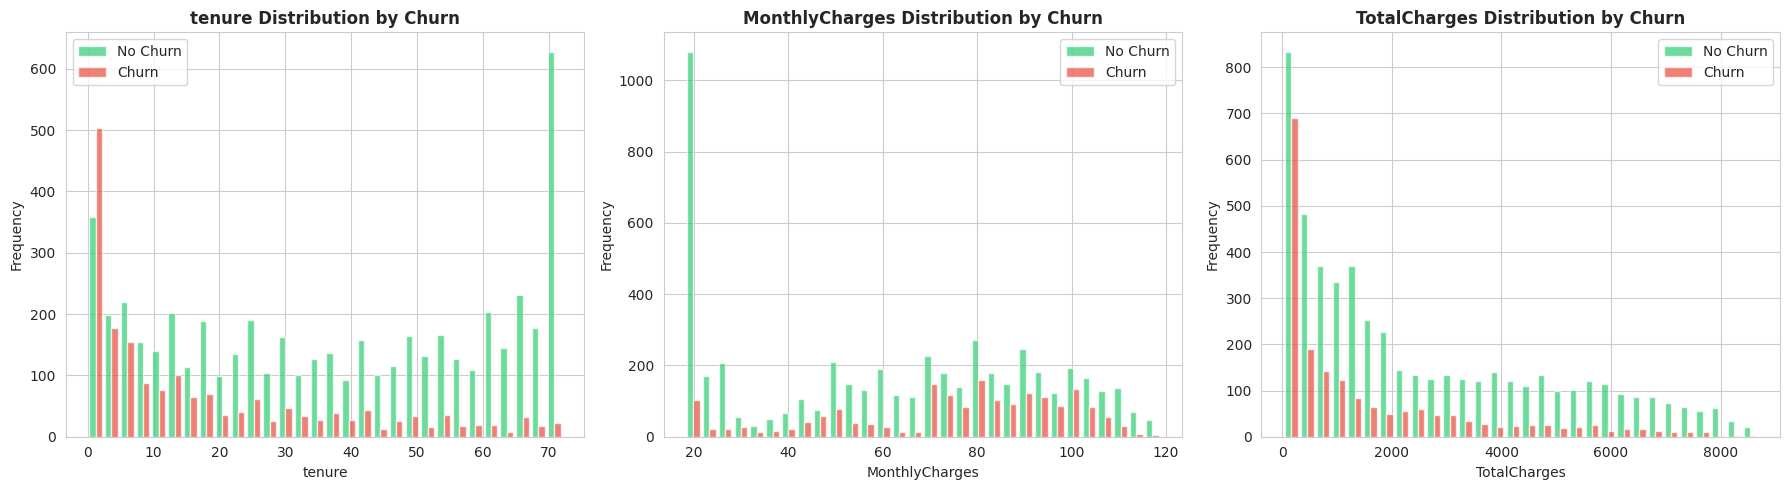

In [17]:
#  Summary Statistics by Churn
print("="*60)
print("SUMMARY STATISTICS BY CHURN STATUS")
print("="*60)

df_stats = df.copy()
df_stats['TotalCharges'] = pd.to_numeric(df_stats['TotalCharges'], errors='coerce')

print("\nNo Churn:")
print(df_stats[df_stats['Churn'] == 'No'][numerical_cols].describe())

print("\n" + "="*60)
print("Churn:")
print(df_stats[df_stats['Churn'] == 'Yes'][numerical_cols].describe())

# Visual comparison
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for idx, col in enumerate(numerical_cols):
    churn_no = df_stats[df_stats['Churn'] == 'No'][col].dropna()
    churn_yes = df_stats[df_stats['Churn'] == 'Yes'][col].dropna()
    
    axes[idx].hist([churn_no, churn_yes], bins=30, label=['No Churn', 'Churn'], 
                   color=['#2ecc71', '#e74c3c'], alpha=0.7)
    axes[idx].set_title(f'{col} Distribution by Churn', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Frequency')
    axes[idx].legend()

plt.tight_layout()
plt.show()

In [18]:
df_new = df.copy()
# Convert TotalCharges to numeric, coercing errors to NaN (for empty strings)
df_new['TotalCharges'] = pd.to_numeric(df_new['TotalCharges'], errors='coerce')
df_new.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


--- Step 0: HANDLING MISSING VALUES ---
NaNs found and imputed with 0 in TotalCharges: 11

--- PART 1: ORIGINAL DISTRIBUTION OF TotalCharges (After Imputation) ---


/tmp/ipython-input-2524756552.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_new['TotalCharges'].fillna(0, inplace=True)


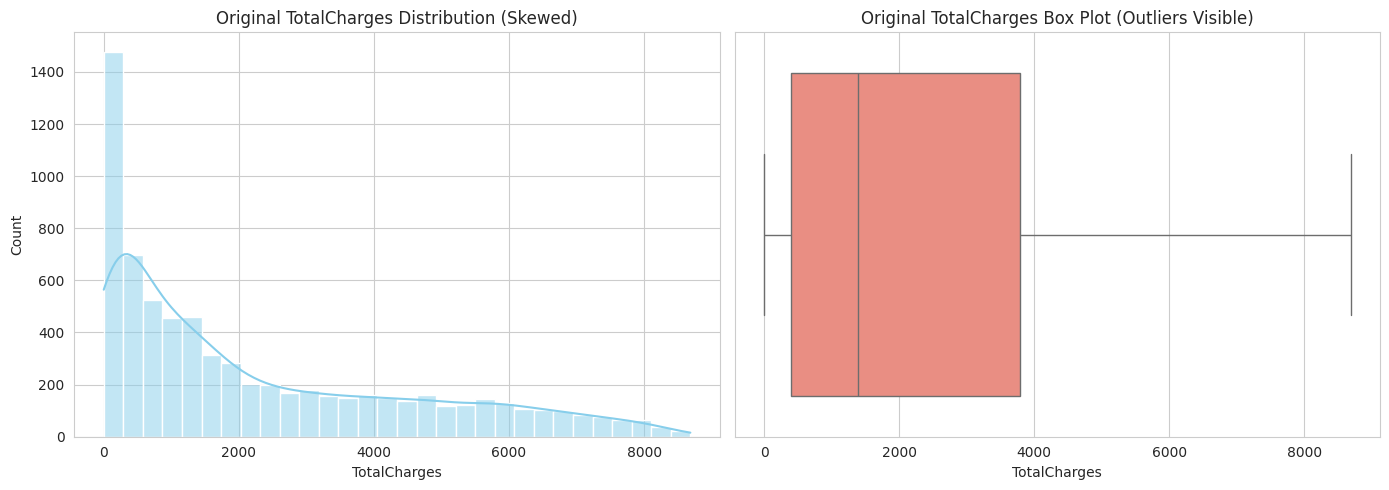


--- PART 2: LOG TRANSFORMATION COMPLETE (IN-PLACE) ---
The 'TotalCharges' column has been log-transformed and now contains the transformed values.
Skew before transformation: 0.9632 (Original Skew)
Skew after transformation: -0.8245

--- PART 3: TRANSFORMED DISTRIBUTION OF TotalCharges ---


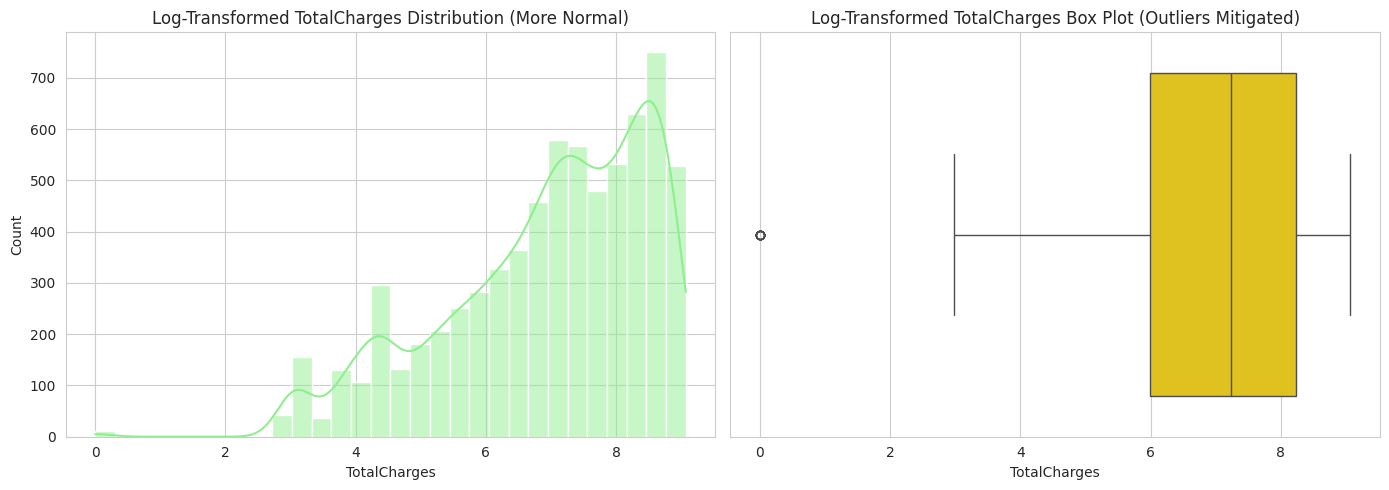

In [19]:
# Assuming 'df_new' contains your processed data up to this point,
# with 'TotalCharges' converted to numeric and NaNs still present.

# --- Step 0: Imputation ---
# Since TotalCharges NaNs often mean 0 (new customer with tenure=0), 
# we fill NaNs with 0 BEFORE applying the log transformation. 
# This must be done first, as np.log1p() cannot handle NaNs.

print("--- Step 0: HANDLING MISSING VALUES ---")
# Count NaNs before imputation
nan_count = df_new['TotalCharges'].isna().sum()
df_new['TotalCharges'].fillna(0, inplace=True)
print(f"NaNs found and imputed with 0 in TotalCharges: {nan_count}")

# --- PART 1: Graph the Original Skewed Data ---
print("\n--- PART 1: ORIGINAL DISTRIBUTION OF TotalCharges (After Imputation) ---")
# Use a histogram and a Box Plot for comparison
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram
sns.histplot(df_new['TotalCharges'], bins=30, kde=True, ax=axes[0], color='skyblue')
axes[0].set_title('Original TotalCharges Distribution (Skewed)')

# Box Plot
sns.boxplot(x=df_new['TotalCharges'], ax=axes[1], color='salmon')
axes[1].set_title('Original TotalCharges Box Plot (Outliers Visible)')

plt.tight_layout()
plt.show()

# --- PART 2: Apply Logarithmic Transformation In-Place ---

# Apply the Logarithmic Transformation directly back into the 'TotalCharges' column.
# We use np.log1p(x), which calculates log(1 + x). This handles the 0s we imputed 
# in Step 0 gracefully, as log(1+0) = 0.
df_new['TotalCharges'] = np.log1p(df_new['TotalCharges'])

print("\n--- PART 2: LOG TRANSFORMATION COMPLETE (IN-PLACE) ---")
print("The 'TotalCharges' column has been log-transformed and now contains the transformed values.")
print(f"Skew before transformation: {df_new['TotalCharges'].apply(lambda x: np.expm1(x)).skew():.4f} (Original Skew)")
print(f"Skew after transformation: {df_new['TotalCharges'].skew():.4f}")


# --- PART 3: Graph the Unskewed Data ---
print("\n--- PART 3: TRANSFORMED DISTRIBUTION OF TotalCharges ---")

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram
sns.histplot(df_new['TotalCharges'], bins=30, kde=True, ax=axes[0], color='lightgreen')
axes[0].set_title('Log-Transformed TotalCharges Distribution (More Normal)')


# Box Plot
sns.boxplot(x=df_new['TotalCharges'], ax=axes[1], color='gold')
axes[1].set_title('Log-Transformed TotalCharges Box Plot (Outliers Mitigated)')

plt.tight_layout()
plt.show()

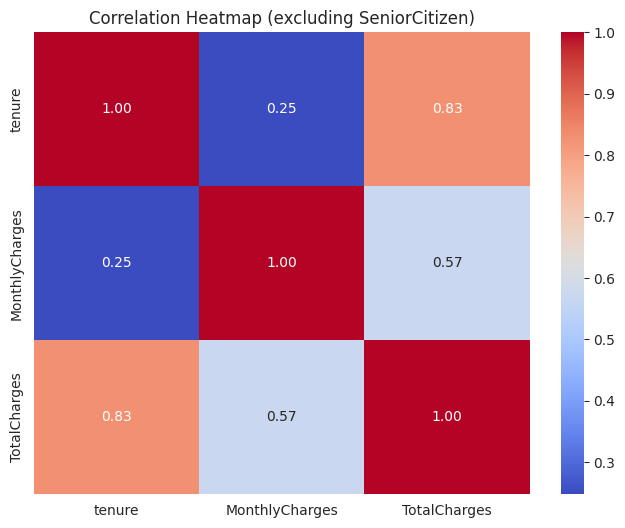

In [20]:
# Select numeric columns and drop 'SeniorCitizen'
numeric_df = df_new.select_dtypes(include=['number']).drop(columns=['SeniorCitizen'])

# Calculate correlation matrix
corr = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap (excluding SeniorCitizen)')
plt.show()

In [21]:
for col in df.columns:
  if col not in ['tenure', 'MonthlyCharges', 'TotalCharges']:
    print(f"{col}: {df[col].unique()}")

customerID: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [22]:
# Convert SeniorCitizen to boolean
df_new['SeniorCitizen'] = df_new['SeniorCitizen'].astype(bool)

# Convert categorical columns
categorical_cols = ['SeniorCitizen','gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                    'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                    'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
                    'PaperlessBilling', 'PaymentMethod', 'Churn']

for col in categorical_cols:
    df_new[col] = df_new[col].astype('category')

In [23]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        7043 non-null   object  
 1   gender            7043 non-null   category
 2   SeniorCitizen     7043 non-null   category
 3   Partner           7043 non-null   category
 4   Dependents        7043 non-null   category
 5   tenure            7043 non-null   int64   
 6   PhoneService      7043 non-null   category
 7   MultipleLines     7043 non-null   category
 8   InternetService   7043 non-null   category
 9   OnlineSecurity    7043 non-null   category
 10  OnlineBackup      7043 non-null   category
 11  DeviceProtection  7043 non-null   category
 12  TechSupport       7043 non-null   category
 13  StreamingTV       7043 non-null   category
 14  StreamingMovies   7043 non-null   category
 15  Contract          7043 non-null   category
 16  PaperlessBilling  7043 n

In [24]:
df.head().to_numpy()

array([['7590-VHVEG', 'Female', 0, 'Yes', 'No', 1, 'No',
        'No phone service', 'DSL', 'No', 'Yes', 'No', 'No', 'No', 'No',
        'Month-to-month', 'Yes', 'Electronic check', 29.85, '29.85',
        'No'],
       ['5575-GNVDE', 'Male', 0, 'No', 'No', 34, 'Yes', 'No', 'DSL',
        'Yes', 'No', 'Yes', 'No', 'No', 'No', 'One year', 'No',
        'Mailed check', 56.95, '1889.5', 'No'],
       ['3668-QPYBK', 'Male', 0, 'No', 'No', 2, 'Yes', 'No', 'DSL',
        'Yes', 'Yes', 'No', 'No', 'No', 'No', 'Month-to-month', 'Yes',
        'Mailed check', 53.85, '108.15', 'Yes'],
       ['7795-CFOCW', 'Male', 0, 'No', 'No', 45, 'No',
        'No phone service', 'DSL', 'Yes', 'No', 'Yes', 'Yes', 'No', 'No',
        'One year', 'No', 'Bank transfer (automatic)', 42.3, '1840.75',
        'No'],
       ['9237-HQITU', 'Female', 0, 'No', 'No', 2, 'Yes', 'No',
        'Fiber optic', 'No', 'No', 'No', 'No', 'No', 'No',
        'Month-to-month', 'Yes', 'Electronic check', 70.7, '151.65',
        'Ye

In [25]:
from sklearn.preprocessing import LabelEncoder

# Binary encoding for binary columns
binary_cols = ['SeniorCitizen','gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']
for col in binary_cols:
    df_new[col] = LabelEncoder().fit_transform(df_new[col])

# One-hot encoding for nominal multi-class columns
nominal_cols = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 
                'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 
                'Contract', 'PaymentMethod']
df_encoded = pd.get_dummies(df_new, columns=nominal_cols, drop_first=True)

# Encode target
df_encoded['Churn'] = LabelEncoder().fit_transform(df_encoded['Churn'])

In [27]:
df_encoded.head(1)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,0,0,1,0,1,0,1,29.85,3.429137,...,False,False,False,False,False,False,False,False,True,False


In [28]:
# Drop customerID
df_encoded = df_encoded.drop('customerID', axis=1)

# Convert all boolean columns to int
df_encoded = df_encoded.astype({col: int for col in df_encoded.select_dtypes(include='bool').columns})

In [29]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   gender                                 7043 non-null   int64  
 1   SeniorCitizen                          7043 non-null   int64  
 2   Partner                                7043 non-null   int64  
 3   Dependents                             7043 non-null   int64  
 4   tenure                                 7043 non-null   int64  
 5   PhoneService                           7043 non-null   int64  
 6   PaperlessBilling                       7043 non-null   int64  
 7   MonthlyCharges                         7043 non-null   float64
 8   TotalCharges                           7043 non-null   float64
 9   Churn                                  7043 non-null   int64  
 10  MultipleLines_No phone service         7043 non-null   int64  
 11  Mult

In [30]:
df_encoded['Churn'].sum()

np.int64(1869)

In [31]:
df_encoded[df_encoded['TotalCharges'].isna()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check


In [32]:
X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


Here we will experiment with a second version where column 'Total Charges' is removed due to collinearilty with column 'Tenure'

In [33]:
X_v2 = df_encoded.drop(['Churn','TotalCharges'], axis=1)
y = df_encoded['Churn']
X_v2_train, X_v2_test, y_train, y_test = train_test_split(X_v2, y, test_size=0.2, random_state=42, stratify=y)


In [34]:
target_scaling_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

cols_to_scale = [col for col in target_scaling_cols if col in X.columns]
cols_passthrough = [col for col in X.columns if col not in cols_to_scale]

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('scaler', StandardScaler(), cols_to_scale),
        ('passthrough', 'passthrough', cols_passthrough)
    ])


In [36]:
pipelines = {
    'LogisticRegression': Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', LogisticRegression(max_iter=1000))
    ]),
    'RandomForest': Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', RandomForestClassifier(random_state=42))
    ]),
    'GradientBoosting': Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', GradientBoostingClassifier(random_state=42))
    ]),
    'XGBoost': Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', xgb.XGBClassifier(random_state=42, eval_metric='logloss'))
    ])
}

In [37]:
param_grids = {
    'LogisticRegression': {
        'classifier__C': [0.01, 0.1, 1, 10], #classifier__C (Inverse of Regularization Strength)
        'classifier__penalty': ['l1', 'l2'], #'l1'-lasso (some coefficients become 0) #'l2' -ridge
        'classifier__solver': ['liblinear'] #classifier_solver - optimization algorithm
    },
    'RandomForest': {
        'classifier__n_estimators': [100, 200, 300], # number of trees
        'classifier__max_depth': [10, 20, None], # None means no limit
        'classifier__min_samples_split': [2, 5, 10]
    },
    'GradientBoosting': {
        'classifier__n_estimators': [100, 200],
        'classifier__learning_rate': [0.01, 0.1, 0.2],
        'classifier__max_depth': [3, 5, 7]
    },
    'XGBoost': {
        'classifier__n_estimators': [100, 200],
        'classifier__learning_rate': [0.01, 0.1, 0.2],
        'classifier__max_depth': [3, 5, 7],
        'classifier__subsample': [0.8, 1.0] #for Stochastic Gradient Boosting 
    }
}

In [38]:
results = {}
for name in pipelines.keys():
    print(f"\nTraining {name}...")
    
    search = GridSearchCV(
        pipelines[name],
        param_grids[name],
        cv=5,
        scoring='roc_auc',
        n_jobs=-1,
        verbose=1
    )
    
    # Fit on raw (unscaled) training data - pipeline handles scaling
    search.fit(X_train, y_train)
    
    # Evaluate
    best_pipeline = search.best_estimator_
    y_pred = best_pipeline.predict(X_test)
    y_proba = best_pipeline.predict_proba(X_test)[:, 1]
    
    results[name] = {
        'best_params': search.best_params_,
        'accuracy': accuracy_score(y_test, y_pred),
        'roc_auc': roc_auc_score(y_test, y_proba),
        'pipeline': best_pipeline
    }
    
    print(f"Best params: {search.best_params_}")
    print(f"Accuracy: {results[name]['accuracy']:.4f}")
    print(f"ROC-AUC: {results[name]['roc_auc']:.4f}")



Training LogisticRegression...
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best params: {'classifier__C': 10, 'classifier__penalty': 'l2', 'classifier__solver': 'liblinear'}
Accuracy: 0.8041
ROC-AUC: 0.8467

Training RandomForest...
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best params: {'classifier__max_depth': 10, 'classifier__min_samples_split': 10, 'classifier__n_estimators': 300}
Accuracy: 0.8041
ROC-AUC: 0.8427

Training GradientBoosting...
Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best params: {'classifier__learning_rate': 0.1, 'classifier__max_depth': 3, 'classifier__n_estimators': 100}
Accuracy: 0.7977
ROC-AUC: 0.8414

Training XGBoost...
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best params: {'classifier__learning_rate': 0.1, 'classifier__max_depth': 3, 'classifier__n_estimators': 100, 'classifier__subsample': 0.8}
Accuracy: 0.8020
ROC-AUC: 0.8465


In [39]:
results_df = pd.DataFrame({
    name: {'Accuracy': res['accuracy'], 'ROC-AUC': res['roc_auc']}
    for name, res in results.items()
}).T.sort_values('ROC-AUC', ascending=False)

print("\n" + "="*50)
print("MODEL COMPARISON")
print("="*50)
print(results_df)


MODEL COMPARISON
                    Accuracy   ROC-AUC
LogisticRegression  0.804116  0.846666
XGBoost             0.801987  0.846525
RandomForest        0.804116  0.842712
GradientBoosting    0.797729  0.841396


In [40]:
# Calculate class weights for XGBoost
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
scale_pos_weight = class_weights[1] / class_weights[0]

print(f"Class distribution: {y.value_counts()}")
print(f"Scale pos weight for XGBoost: {scale_pos_weight:.2f}")

# Update pipelines with class weights
pipelines = {
    'LogisticRegression': Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', LogisticRegression(max_iter=1000, class_weight='balanced'))
    ]),
    'RandomForest': Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', RandomForestClassifier(random_state=42, class_weight='balanced'))
    ]),
    'GradientBoosting': Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', GradientBoostingClassifier(random_state=42))
    ]),
    'XGBoost': Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', xgb.XGBClassifier(random_state=42, eval_metric='logloss', 
                                        scale_pos_weight=scale_pos_weight))
    ])
}

# Update param grids (same as before, just redefining for completeness)
param_grids = {
    'LogisticRegression': {
        'classifier__C': [0.01, 0.1, 1, 10],
        'classifier__penalty': ['l1', 'l2'],
        'classifier__solver': ['liblinear']
    },
    'RandomForest': {
        'classifier__n_estimators': [100, 200, 300],
        'classifier__max_depth': [10, 20, None],
        'classifier__min_samples_split': [2, 5, 10]
    },
    'GradientBoosting': {
        'classifier__n_estimators': [100, 200],
        'classifier__learning_rate': [0.01, 0.1, 0.2],
        'classifier__max_depth': [3, 5, 7]
    },
    'XGBoost': {
        'classifier__n_estimators': [100, 200],
        'classifier__learning_rate': [0.01, 0.1, 0.2],
        'classifier__max_depth': [3, 5, 7],
        'classifier__subsample': [0.8, 1.0]
    }
}

# Train with class weights
results = {}
for name in pipelines.keys():
    print(f"\nTraining {name}...")
    
    search = GridSearchCV(
        pipelines[name],
        param_grids[name],
        cv=5,
        scoring='roc_auc',
        n_jobs=-1,
        verbose=1
    )
    
    search.fit(X_train, y_train)
    
    best_pipeline = search.best_estimator_
    y_pred = best_pipeline.predict(X_test)
    y_proba = best_pipeline.predict_proba(X_test)[:, 1]
    
    # Add more metrics for imbalanced data
    from sklearn.metrics import precision_score, recall_score, f1_score
    
    results[name] = {
        'best_params': search.best_params_,
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred),
        'recall': recall_score(y_test, y_pred),
        'f1_score': f1_score(y_test, y_pred),
        'roc_auc': roc_auc_score(y_test, y_proba),
        'pipeline': best_pipeline
    }
    
    print(f"Best params: {search.best_params_}")
    print(f"Accuracy: {results[name]['accuracy']:.4f}")
    print(f"Precision: {results[name]['precision']:.4f}")
    print(f"Recall: {results[name]['recall']:.4f}")
    print(f"F1-Score: {results[name]['f1_score']:.4f}")
    print(f"ROC-AUC: {results[name]['roc_auc']:.4f}")

# Updated comparison with more metrics
results_df = pd.DataFrame({
    name: {
        'Accuracy': res['accuracy'],
        'Precision': res['precision'],
        'Recall': res['recall'],
        'F1-Score': res['f1_score'],
        'ROC-AUC': res['roc_auc']
    }
    for name, res in results.items()
}).T.sort_values('ROC-AUC', ascending=False)

print("\n" + "="*50)
print("MODEL COMPARISON (with class weights)")
print("="*50)
print(results_df)

Class distribution: Churn
0    5174
1    1869
Name: count, dtype: int64
Scale pos weight for XGBoost: 2.77

Training LogisticRegression...
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best params: {'classifier__C': 10, 'classifier__penalty': 'l2', 'classifier__solver': 'liblinear'}
Accuracy: 0.7367
Precision: 0.5025
Recall: 0.7968
F1-Score: 0.6163
ROC-AUC: 0.8468

Training RandomForest...
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best params: {'classifier__max_depth': 10, 'classifier__min_samples_split': 10, 'classifier__n_estimators': 300}
Accuracy: 0.7665
Precision: 0.5437
Recall: 0.7487
F1-Score: 0.6299
ROC-AUC: 0.8425

Training GradientBoosting...
Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best params: {'classifier__learning_rate': 0.1, 'classifier__max_depth': 3, 'classifier__n_estimators': 100}
Accuracy: 0.7977
Precision: 0.6540
Recall: 0.5053
F1-Score: 0.5701
ROC-AUC: 0.8414

Training XGBoost...
Fitting 5 folds for each of 36 

In [41]:
# ============================================
# SECTION: MODEL INTERPRETATION & EVALUATION
# ============================================

print("="*60)
print("DETAILED MODEL EVALUATION & INTERPRETATION")
print("="*60)

DETAILED MODEL EVALUATION & INTERPRETATION



1. CONFUSION MATRICES

LogisticRegression:
  True Negatives: 740
  False Positives: 295
  False Negatives: 76
  True Positives: 298

RandomForest:
  True Negatives: 800
  False Positives: 235
  False Negatives: 94
  True Positives: 280

GradientBoosting:
  True Negatives: 935
  False Positives: 100
  False Negatives: 185
  True Positives: 189

XGBoost:
  True Negatives: 750
  False Positives: 285
  False Negatives: 75
  True Positives: 299


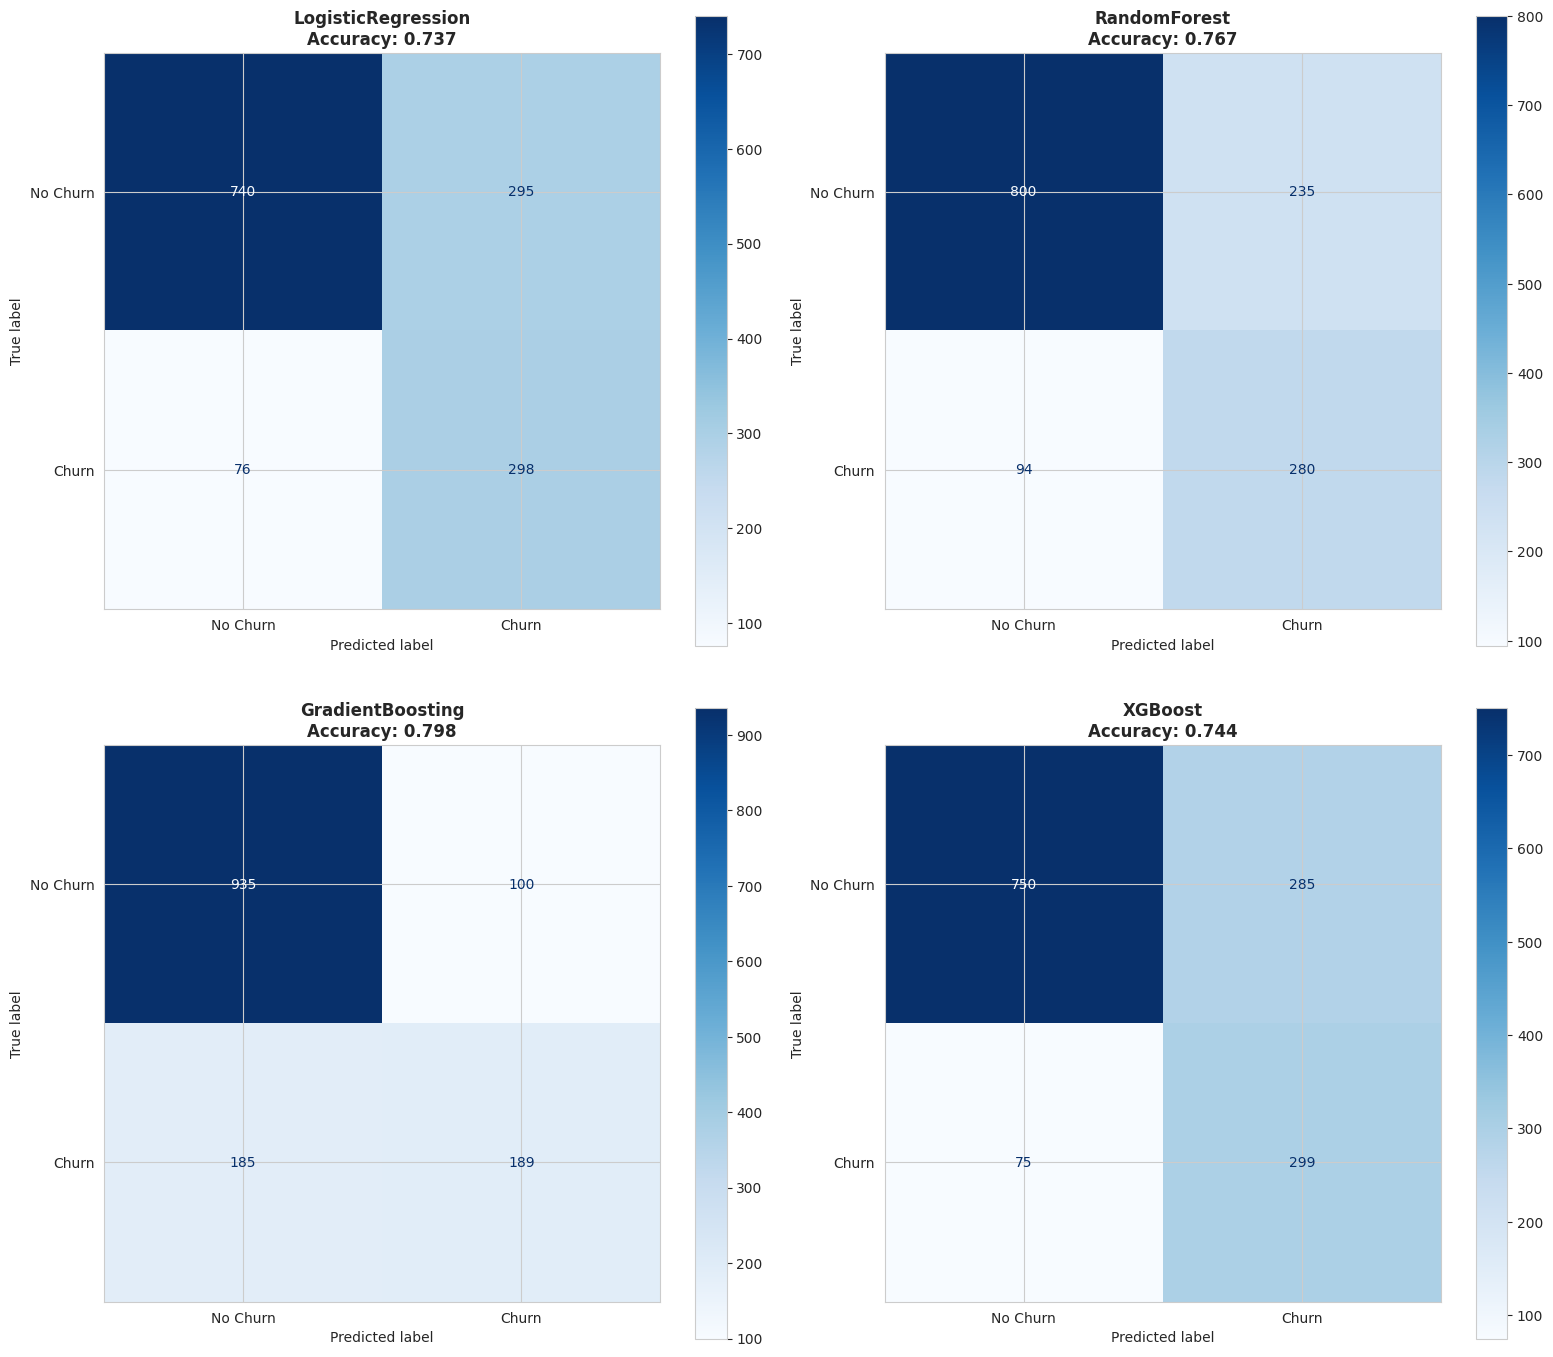

In [42]:
# CONFUSION MATRICES FOR ALL MODELS
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

print("\n1. CONFUSION MATRICES")
print("="*60)

fig, axes = plt.subplots(2, 2, figsize=(16, 14))
axes = axes.ravel()

for idx, (name, result) in enumerate(results.items()):
    best_model = result['pipeline']
    y_pred = best_model.predict(X_test)
    
    # Create confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Churn', 'Churn'])
    disp.plot(ax=axes[idx], cmap='Blues', values_format='d')
    axes[idx].set_title(f'{name}\nAccuracy: {result["accuracy"]:.3f}', fontsize=12, fontweight='bold')
    
    # Print detailed metrics
    print(f"\n{name}:")
    print(f"  True Negatives: {cm[0,0]}")
    print(f"  False Positives: {cm[0,1]}")
    print(f"  False Negatives: {cm[1,0]}")
    print(f"  True Positives: {cm[1,1]}")

plt.tight_layout()
plt.show()


3. PRECISION-RECALL CURVES


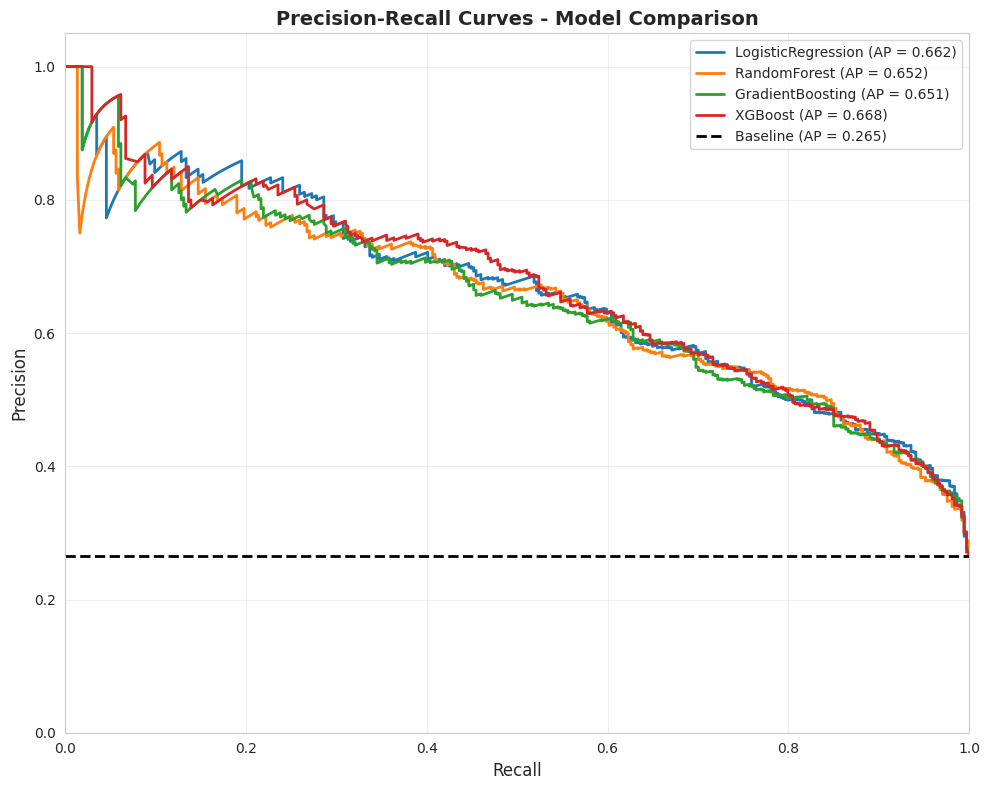

In [43]:
# PRECISION-RECALL CURVES
from sklearn.metrics import precision_recall_curve, average_precision_score, PrecisionRecallDisplay

print("\n3. PRECISION-RECALL CURVES")
print("="*60)

fig, ax = plt.subplots(figsize=(10, 8))

for name, result in results.items():
    best_model = result['pipeline']
    y_proba = best_model.predict_proba(X_test)[:, 1]
    
    precision, recall, _ = precision_recall_curve(y_test, y_proba)
    avg_precision = average_precision_score(y_test, y_proba)
    
    ax.plot(recall, precision, lw=2, label=f'{name} (AP = {avg_precision:.3f})')

# Baseline (random classifier)
baseline = y_test.sum() / len(y_test)
ax.axhline(y=baseline, color='k', linestyle='--', lw=2, label=f'Baseline (AP = {baseline:.3f})')

ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('Recall', fontsize=12)
ax.set_ylabel('Precision', fontsize=12)
ax.set_title('Precision-Recall Curves - Model Comparison', fontsize=14, fontweight='bold')
ax.legend(loc='best', fontsize=10)
ax.grid(alpha=0.3)

plt.tight_layout()
plt.show()


4. FEATURE IMPORTANCE ANALYSIS

RandomForest - Top 10 Features:
  gender: 0.1834
  Partner: 0.1422
  Contract_Two year: 0.1023
  SeniorCitizen: 0.0944
  InternetService_Fiber optic: 0.0697
  PaymentMethod_Electronic check: 0.0529
  Contract_One year: 0.0427
  OnlineSecurity_Yes: 0.0304
  TechSupport_Yes: 0.0255
  TotalCharges: 0.0196

GradientBoosting - Top 10 Features:
  gender: 0.2963
  InternetService_Fiber optic: 0.1879
  PaymentMethod_Electronic check: 0.1242
  Contract_Two year: 0.0744
  Partner: 0.0696
  Contract_One year: 0.0597
  SeniorCitizen: 0.0555
  TotalCharges: 0.0228
  OnlineSecurity_Yes: 0.0182
  DeviceProtection_No internet service: 0.0173

XGBoost - Top 10 Features:
  Contract_Two year: 0.2660
  Contract_One year: 0.2028
  InternetService_Fiber optic: 0.1225
  InternetService_No: 0.0963
  PaymentMethod_Electronic check: 0.0444
  gender: 0.0391
  StreamingMovies_Yes: 0.0335
  StreamingTV_Yes: 0.0210
  OnlineSecurity_Yes: 0.0206
  TotalCharges: 0.0189


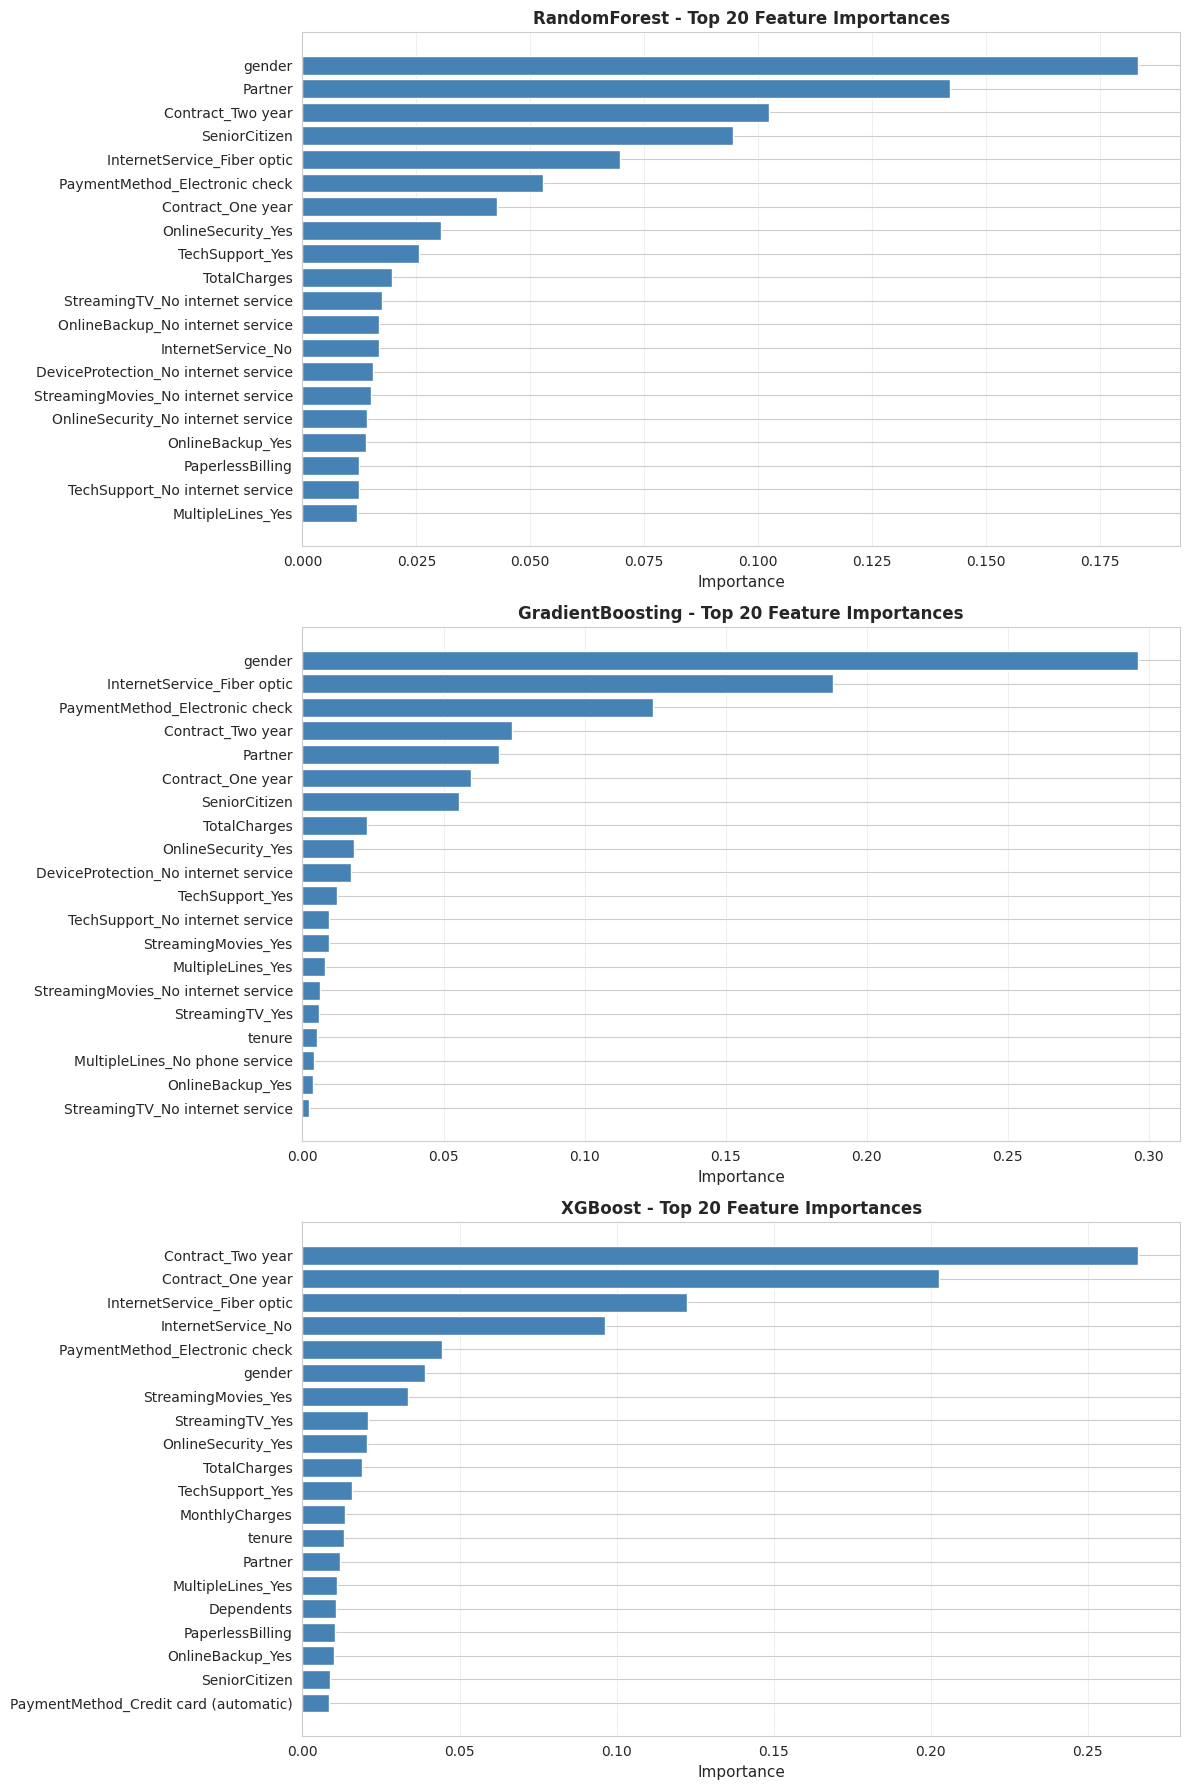

In [44]:
# FEATURE IMPORTANCE (Tree-based Models)
print("\n4. FEATURE IMPORTANCE ANALYSIS")
print("="*60)

tree_models = ['RandomForest', 'GradientBoosting', 'XGBoost']
available_tree_models = [m for m in tree_models if m in results]

if available_tree_models:
    fig, axes = plt.subplots(len(available_tree_models), 1, figsize=(12, 6*len(available_tree_models)))
    
    if len(available_tree_models) == 1:
        axes = [axes]
    
    for idx, model_name in enumerate(available_tree_models):
        best_model = results[model_name]['pipeline']
        classifier = best_model.named_steps['classifier']
        
        # Get feature importances
        importances = classifier.feature_importances_
        feature_names = X.columns
        
        # Create dataframe and sort
        importance_df = pd.DataFrame({
            'Feature': feature_names,
            'Importance': importances
        }).sort_values('Importance', ascending=False)
        
        # Plot top 20 features
        top_n = min(20, len(importance_df))
        top_features = importance_df.head(top_n)
        
        axes[idx].barh(range(top_n), top_features['Importance'], color='steelblue')
        axes[idx].set_yticks(range(top_n))
        axes[idx].set_yticklabels(top_features['Feature'])
        axes[idx].invert_yaxis()
        axes[idx].set_xlabel('Importance', fontsize=11)
        axes[idx].set_title(f'{model_name} - Top {top_n} Feature Importances', 
                           fontsize=12, fontweight='bold')
        axes[idx].grid(axis='x', alpha=0.3)
        
        # Print top 10
        print(f"\n{model_name} - Top 10 Features:")
        for i, row in importance_df.head(10).iterrows():
            print(f"  {row['Feature']}: {row['Importance']:.4f}")
    
    plt.tight_layout()
    plt.show()
else:
    print("No tree-based models found in results.")


2. ROC CURVES


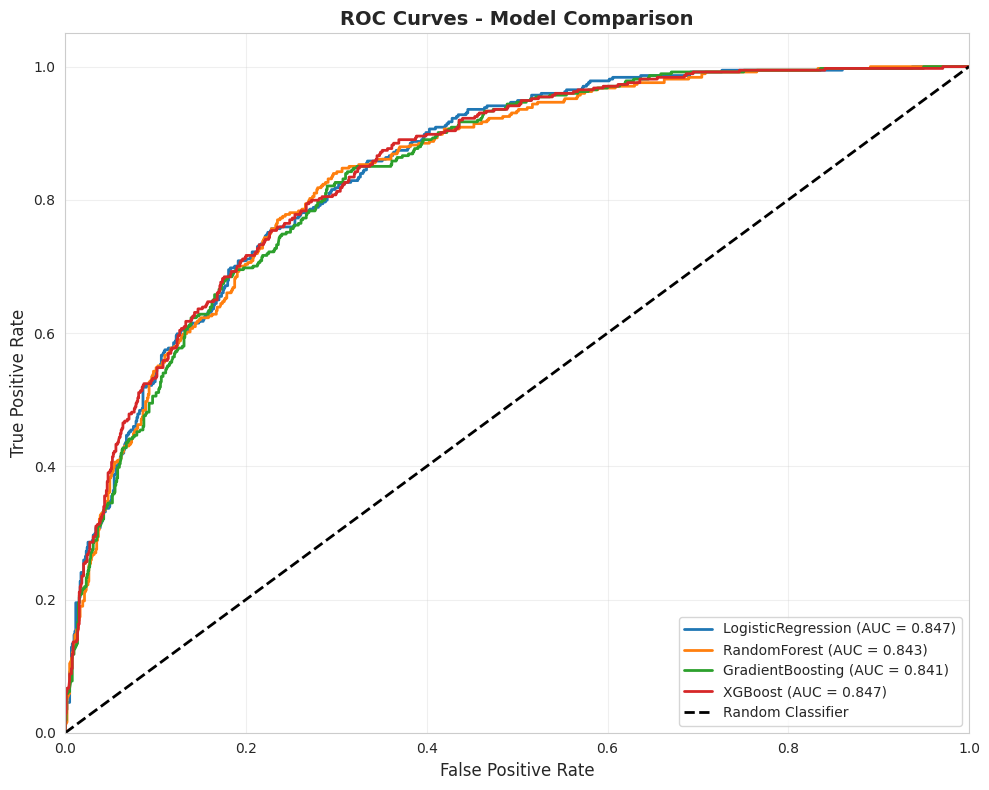

In [45]:
#  ROC CURVES - The analysis of this ROC curve suggests that all 
# four models are strong performers for this classification task, as their AUC values are well above 0.5.
from sklearn.metrics import roc_curve, auc, RocCurveDisplay

print("\n2. ROC CURVES")
print("="*60)

fig, ax = plt.subplots(figsize=(10, 8))

for name, result in results.items():
    best_model = result['pipeline']
    y_proba = best_model.predict_proba(X_test)[:, 1]
    
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    
    ax.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {roc_auc:.3f})')

# Plot diagonal
ax.plot([0, 1], [0, 1], 'k--', lw=2, label='Random Classifier')

ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate', fontsize=12)
ax.set_ylabel('True Positive Rate', fontsize=12)
ax.set_title('ROC Curves - Model Comparison', fontsize=14, fontweight='bold')
ax.legend(loc='lower right', fontsize=10)
ax.grid(alpha=0.3)

plt.tight_layout()
plt.show()


5. LEARNING CURVES
Generating learning curves for best model: XGBoost
[learning_curve] Training set sizes: [ 450  901 1352 1802 2253 2704 3154 3605 4056 4507]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    4.4s finished


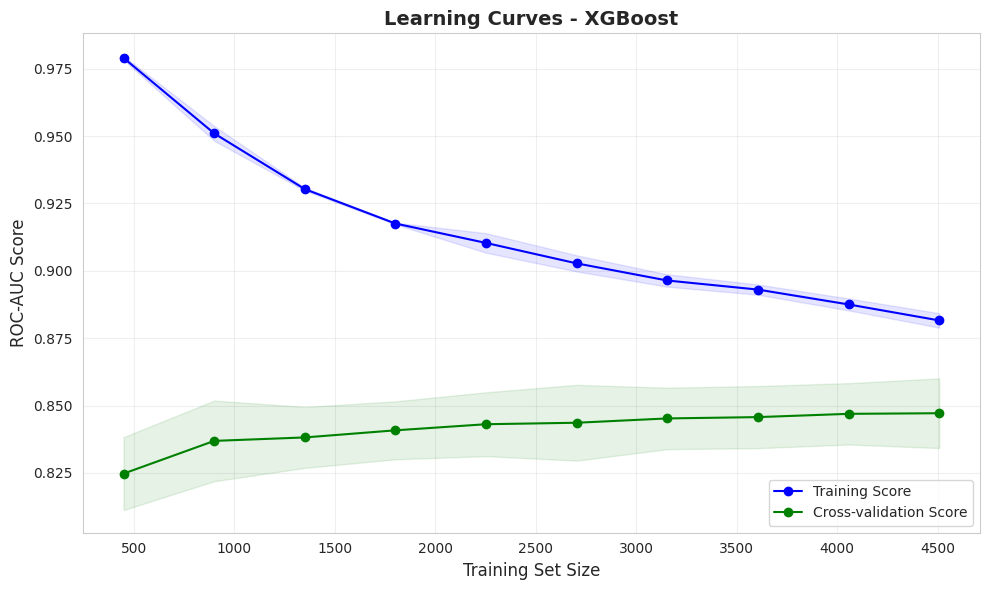


Final training score: 0.8816 (+/- 0.0027)
Final validation score: 0.8471 (+/- 0.0129)


In [46]:
#  LEARNING CURVES
from sklearn.model_selection import learning_curve

print("\n5. LEARNING CURVES")
print("="*60)

# Choose best performing model based on ROC-AUC
best_model_name = results_df.sort_values('ROC-AUC', ascending=False).index[0]
print(f"Generating learning curves for best model: {best_model_name}")

best_pipeline = results[best_model_name]['pipeline']

# Calculate learning curves
train_sizes = np.linspace(0.1, 1.0, 10)
train_sizes_abs, train_scores, test_scores = learning_curve(
    best_pipeline, X_train, y_train, 
    cv=5, 
    n_jobs=-1, 
    train_sizes=train_sizes,
    scoring='roc_auc',
    verbose=1
)

# Calculate mean and std
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(train_sizes_abs, train_mean, 'o-', color='blue', label='Training Score')
ax.fill_between(train_sizes_abs, train_mean - train_std, train_mean + train_std, 
                alpha=0.1, color='blue')

ax.plot(train_sizes_abs, test_mean, 'o-', color='green', label='Cross-validation Score')
ax.fill_between(train_sizes_abs, test_mean - test_std, test_mean + test_std, 
                alpha=0.1, color='green')

ax.set_xlabel('Training Set Size', fontsize=12)
ax.set_ylabel('ROC-AUC Score', fontsize=12)
ax.set_title(f'Learning Curves - {best_model_name}', fontsize=14, fontweight='bold')
ax.legend(loc='lower right', fontsize=10)
ax.grid(alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\nFinal training score: {train_mean[-1]:.4f} (+/- {train_std[-1]:.4f})")
print(f"Final validation score: {test_mean[-1]:.4f} (+/- {test_std[-1]:.4f})")


6. ERROR ANALYSIS

Total misclassifications: 360 / 1409 (25.55%)
False Positives (predicted churn, actually no churn): 285
False Negatives (predicted no churn, actually churn): 75


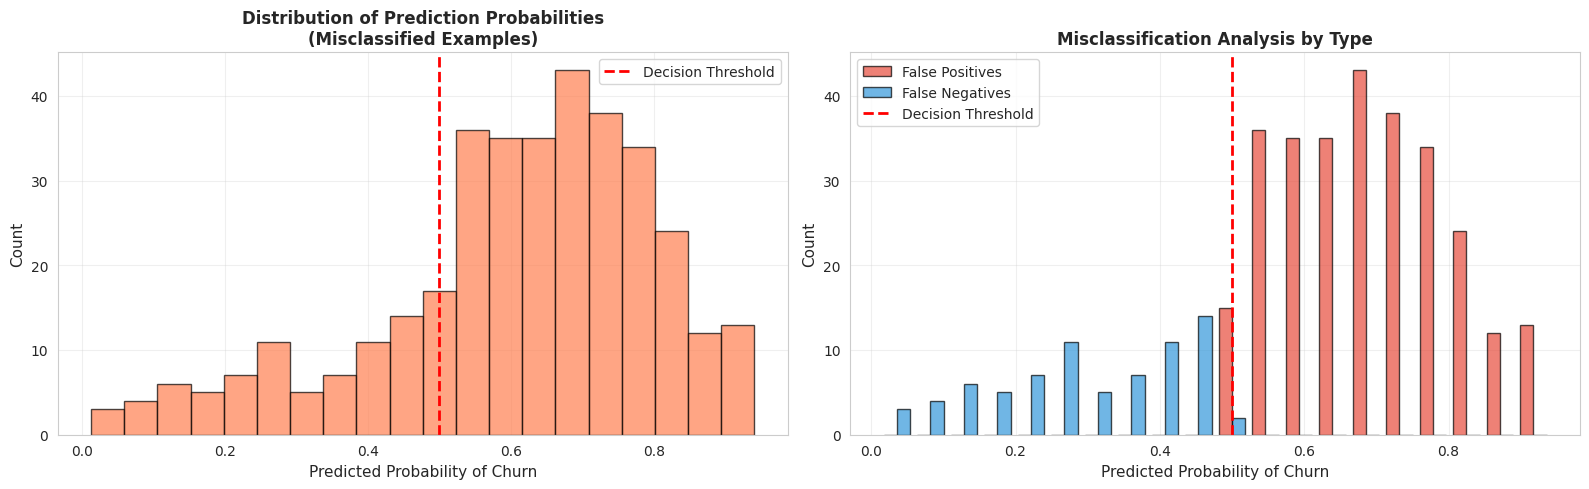


--- High Confidence Misclassifications ---
High confidence errors (>0.8 or <0.2): 67

Sample of high-confidence misclassifications:
      True_Label  Predicted_Label  Predicted_Prob
922            0                1        0.820632
1568           0                1        0.867415
5057           0                1        0.843119
3202           0                1        0.865391
2296           0                1        0.828831


In [47]:
# ERROR ANALYSIS - Misclassified Examples
print("\n6. ERROR ANALYSIS")
print("="*60)

best_model = results[best_model_name]['pipeline']
y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:, 1]

# Find misclassified examples
misclassified_idx = np.where(y_pred != y_test)[0]
print(f"\nTotal misclassifications: {len(misclassified_idx)} / {len(y_test)} ({len(misclassified_idx)/len(y_test)*100:.2f}%)")

# False Positives and False Negatives
false_positives = np.where((y_pred == 1) & (y_test == 0))[0]
false_negatives = np.where((y_pred == 0) & (y_test == 1))[0]

print(f"False Positives (predicted churn, actually no churn): {len(false_positives)}")
print(f"False Negatives (predicted no churn, actually churn): {len(false_negatives)}")

# Analyze confidence of misclassifications
misclassified_proba = y_proba[misclassified_idx]

fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Histogram of prediction probabilities for misclassified
axes[0].hist(misclassified_proba, bins=20, color='coral', edgecolor='black', alpha=0.7)
axes[0].axvline(x=0.5, color='red', linestyle='--', linewidth=2, label='Decision Threshold')
axes[0].set_xlabel('Predicted Probability of Churn', fontsize=11)
axes[0].set_ylabel('Count', fontsize=11)
axes[0].set_title('Distribution of Prediction Probabilities\n(Misclassified Examples)', 
                  fontsize=12, fontweight='bold')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Separate FP and FN probabilities
fp_proba = y_proba[false_positives]
fn_proba = y_proba[false_negatives]

axes[1].hist([fp_proba, fn_proba], bins=20, label=['False Positives', 'False Negatives'],
            color=['#e74c3c', '#3498db'], alpha=0.7, edgecolor='black')
axes[1].axvline(x=0.5, color='red', linestyle='--', linewidth=2, label='Decision Threshold')
axes[1].set_xlabel('Predicted Probability of Churn', fontsize=11)
axes[1].set_ylabel('Count', fontsize=11)
axes[1].set_title('Misclassification Analysis by Type', fontsize=12, fontweight='bold')
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Show examples of high-confidence misclassifications
print("\n--- High Confidence Misclassifications ---")
high_conf_wrong = misclassified_idx[np.abs(misclassified_proba - 0.5) > 0.3]
print(f"High confidence errors (>0.8 or <0.2): {len(high_conf_wrong)}")

if len(high_conf_wrong) > 0:
    # Sample a few to display
    sample_errors = np.random.choice(high_conf_wrong, min(5, len(high_conf_wrong)), replace=False)
    error_df = X_test.iloc[sample_errors].copy()
    error_df['True_Label'] = y_test.iloc[sample_errors].values
    error_df['Predicted_Prob'] = y_proba[sample_errors]
    error_df['Predicted_Label'] = y_pred[sample_errors]
    
    print("\nSample of high-confidence misclassifications:")
    print(error_df[['True_Label', 'Predicted_Label', 'Predicted_Prob']])


7. THRESHOLD ANALYSIS


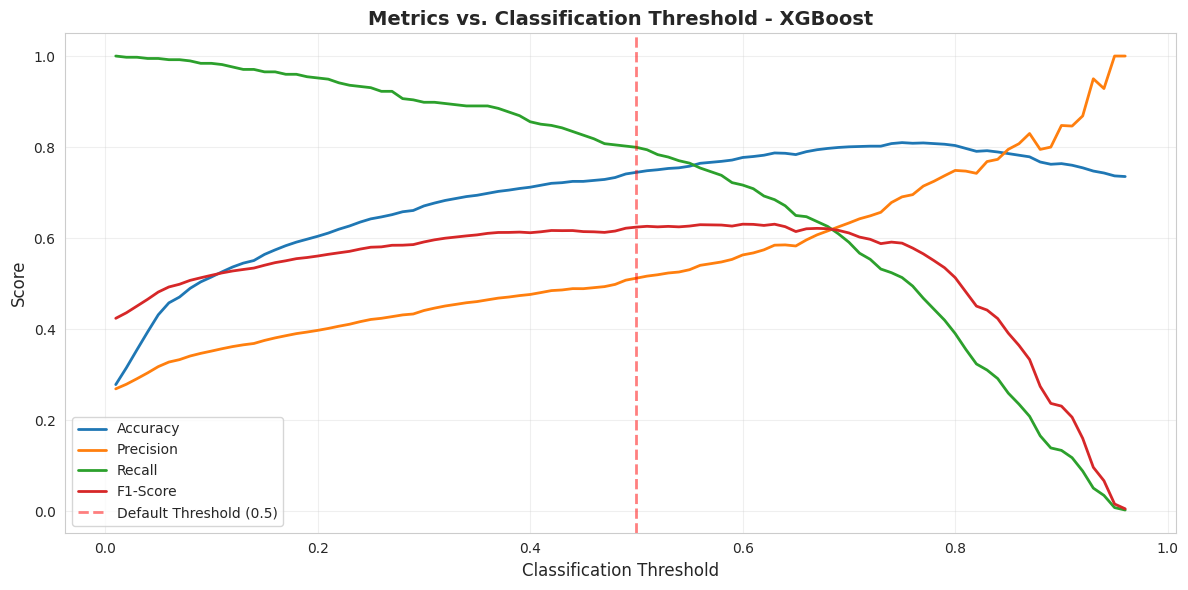


Optimal threshold for F1-Score: 0.600
  F1-Score at optimal: 0.6306
  Precision at optimal: 0.5630
  Recall at optimal: 0.7166


In [50]:
#  THRESHOLD ANALYSIS
print("\n7. THRESHOLD ANALYSIS")
print("="*60)

# Calculate metrics at different thresholds
thresholds = np.linspace(0, 1, 101)
metrics_at_threshold = {
    'threshold': [],
    'accuracy': [],
    'precision': [],
    'recall': [],
    'f1': []
}

y_proba_best = best_model.predict_proba(X_test)[:, 1]

for threshold in thresholds:
    y_pred_threshold = (y_proba_best >= threshold).astype(int)
    
    if y_pred_threshold.sum() > 0 and (1 - y_pred_threshold).sum() > 0:
        metrics_at_threshold['threshold'].append(threshold)
        metrics_at_threshold['accuracy'].append(accuracy_score(y_test, y_pred_threshold))
        metrics_at_threshold['precision'].append(precision_score(y_test, y_pred_threshold, zero_division=0))
        metrics_at_threshold['recall'].append(recall_score(y_test, y_pred_threshold, zero_division=0))
        metrics_at_threshold['f1'].append(f1_score(y_test, y_pred_threshold, zero_division=0))

# Plot
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(metrics_at_threshold['threshold'], metrics_at_threshold['accuracy'], 
        label='Accuracy', linewidth=2)
ax.plot(metrics_at_threshold['threshold'], metrics_at_threshold['precision'], 
        label='Precision', linewidth=2)
ax.plot(metrics_at_threshold['threshold'], metrics_at_threshold['recall'], 
        label='Recall', linewidth=2)
ax.plot(metrics_at_threshold['threshold'], metrics_at_threshold['f1'], 
        label='F1-Score', linewidth=2)

ax.axvline(x=0.5, color='red', linestyle='--', linewidth=2, alpha=0.5, label='Default Threshold (0.5)')
ax.set_xlabel('Classification Threshold', fontsize=12)
ax.set_ylabel('Score', fontsize=12)
ax.set_title(f'Metrics vs. Classification Threshold - {best_model_name}', 
            fontsize=14, fontweight='bold')
ax.legend(loc='best', fontsize=10)
ax.grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Find optimal threshold for F1
optimal_idx = np.argmax(metrics_at_threshold['f1'])
optimal_threshold = metrics_at_threshold['threshold'][optimal_idx]
print(f"\nOptimal threshold for F1-Score: {optimal_threshold:.3f}")
print(f"  F1-Score at optimal: {metrics_at_threshold['f1'][optimal_idx]:.4f}")
print(f"  Precision at optimal: {metrics_at_threshold['precision'][optimal_idx]:.4f}")
print(f"  Recall at optimal: {metrics_at_threshold['recall'][optimal_idx]:.4f}")

In [51]:
#  FINAL MODEL SUMMARY
print("\n" + "="*60)
print("FINAL MODEL RANKING & RECOMMENDATIONS")
print("="*60)

# Display sorted by ROC-AUC
print("\n1. Models ranked by ROC-AUC:")
print(results_df.sort_values('ROC-AUC', ascending=False))

# Best model recommendation
print(f"\n2. RECOMMENDED MODEL: {best_model_name}")
print(f"   ROC-AUC: {results[best_model_name]['roc_auc']:.4f}")
print(f"   Accuracy: {results[best_model_name]['accuracy']:.4f}")
print(f"   Precision: {results[best_model_name]['precision']:.4f}")
print(f"   Recall: {results[best_model_name]['recall']:.4f}")
print(f"   F1-Score: {results[best_model_name]['f1_score']:.4f}")

print("\n3. Key Insights:")
print(f"   - {len(false_positives)} customers incorrectly flagged as churners (cost of retention programs)")
print(f"   - {len(false_negatives)} actual churners not identified (lost revenue)")
print(f"   - Consider using threshold {optimal_threshold:.3f} instead of 0.5 for better F1-Score")


FINAL MODEL RANKING & RECOMMENDATIONS

1. Models ranked by ROC-AUC:
                    Accuracy  Precision    Recall  F1-Score   ROC-AUC
XGBoost             0.744500   0.511986  0.799465  0.624217  0.847387
LogisticRegression  0.736693   0.502530  0.796791  0.616339  0.846788
RandomForest        0.766501   0.543689  0.748663  0.629921  0.842521
GradientBoosting    0.797729   0.653979  0.505348  0.570136  0.841396

2. RECOMMENDED MODEL: XGBoost
   ROC-AUC: 0.8474
   Accuracy: 0.7445
   Precision: 0.5120
   Recall: 0.7995
   F1-Score: 0.6242

3. Key Insights:
   - 285 customers incorrectly flagged as churners (cost of retention programs)
   - 75 actual churners not identified (lost revenue)
   - Consider using threshold 0.600 instead of 0.5 for better F1-Score


In [61]:
from sklearn.preprocessing import StandardScaler

# Create a scaler object
scaler = StandardScaler()

# Select only the numerical columns that need scaling
cols_to_scale = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Create copies so we don't mess up the original dataframes
X_train_nn = X_train.copy()
X_test_nn = X_test.copy()

# Fit on train, transform both
X_train_nn[cols_to_scale] = scaler.fit_transform(X_train_nn[cols_to_scale])
X_test_nn[cols_to_scale] = scaler.transform(X_test_nn[cols_to_scale])

print("Data scaled for Neural Network training.")

Data scaled for Neural Network training.


In [ ]:
def create_nn_model(input_dim, layers_config=[64, 32], dropout=0.3, lr=0.001):
    model = keras.Sequential()
    model.add(layers.Dense(layers_config[0], activation='relu', input_dim=input_dim))
    model.add(layers.Dropout(dropout))
    
    for units in layers_config[1:]:
        model.add(layers.Dense(units, activation='relu'))
        model.add(layers.Dropout(dropout))
    
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(optimizer=keras.optimizers.Adam(lr), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Train with different architectures
nn_configs = [
    {'layers_config': [64, 32], 'dropout': 0.3, 'lr': 0.001},
    {'layers_config': [128, 64, 32], 'dropout': 0.4, 'lr': 0.001},
    {'layers_config': [256, 128, 64], 'dropout': 0.5, 'lr': 0.0001}
]

for i, config in enumerate(nn_configs):
    print(f"\nTraining NN config {i+1}: {config}")
    model = create_nn_model(X_train.shape[1], **config)
    history = model.fit(X_train, y_train, epochs=50, batch_size=32, 
                       validation_split=0.2, verbose=0)
    
    loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
    y_proba = model.predict(X_test).ravel()
    roc_auc = roc_auc_score(y_test, y_proba)
    
    print(f"Accuracy: {accuracy:.4f}, ROC-AUC: {roc_auc:.4f}")


Training NN config 1: {'layers_config': [64, 32], 'dropout': 0.3, 'lr': 0.001}


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Accuracy: 0.7935, ROC-AUC: 0.8426

Training NN config 2: {'layers_config': [128, 64, 32], 'dropout': 0.4, 'lr': 0.001}


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Accuracy: 0.8013, ROC-AUC: 0.8474

Training NN config 3: {'layers_config': [256, 128, 64], 'dropout': 0.5, 'lr': 0.0001}


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Accuracy: 0.7821, ROC-AUC: 0.8171


In [ ]:
# ============================================
# SECTION: DEEP LEARNING WITH IMPROVEMENTS
# ============================================

from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from sklearn.utils.class_weight import compute_class_weight

print("="*60)
print("NEURAL NETWORK TRAINING (WITH IMPROVEMENTS)")
print("="*60)

# 1. Calculate class weights for imbalanced data
class_weights_array = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = {0: class_weights_array[0], 1: class_weights_array[1]}

print(f"\nClass weights for imbalance:")
print(f"  Class 0 (No Churn): {class_weight_dict[0]:.4f}")
print(f"  Class 1 (Churn): {class_weight_dict[1]:.4f}")

# 2. Define improved model creation function
def create_nn_model(input_dim, layers_config=[64, 32], dropout=0.3, lr=0.001):
    """
    Create a neural network model with specified architecture
    
    Args:
        input_dim: Number of input features
        layers_config: List of hidden layer sizes
        dropout: Dropout rate for regularization
        lr: Learning rate for optimizer
    """
    model = keras.Sequential()
    
    # Input layer
    model.add(layers.Dense(layers_config[0], activation='relu', input_dim=input_dim))
    model.add(layers.BatchNormalization())  # Add batch normalization
    model.add(layers.Dropout(dropout))
    
    # Hidden layers
    for units in layers_config[1:]:
        model.add(layers.Dense(units, activation='relu'))
        model.add(layers.BatchNormalization())
        model.add(layers.Dropout(dropout))
    
    # Output layer
    model.add(layers.Dense(1, activation='sigmoid'))
    
    # Compile with Adam optimizer
    model.compile(
        optimizer=Adam(learning_rate=lr),
        loss='binary_crossentropy',
        metrics=['accuracy', keras.metrics.AUC(name='auc'), 
                keras.metrics.Precision(name='precision'),
                keras.metrics.Recall(name='recall')]
    )
    
    return model

# 3. Define callbacks
def get_callbacks(model_name):
    """
    Create callbacks for training
    """
    callbacks = [
        # Early stopping - stop if validation loss doesn't improve
        EarlyStopping(
            monitor='val_loss',
            patience=10,
            restore_best_weights=True,
            verbose=1
        ),
        
        # Reduce learning rate on plateau
        ReduceLROnPlateau(
            monitor='val_loss',
            factor=0.5,
            patience=5,
            min_lr=1e-7,
            verbose=1
        ),
        
        # Save best model
        ModelCheckpoint(
            f'best_model_{model_name}.h5',
            monitor='val_auc',
            mode='max',
            save_best_only=True,
            verbose=0
        )
    ]
    
    return callbacks

# 4. Train multiple architectures
nn_configs = [
    {
        'name': 'Small',
        'layers_config': [64, 32],
        'dropout': 0.3,
        'lr': 0.001,
        'batch_size': 32
    },
    {
        'name': 'Medium',
        'layers_config': [128, 64, 32],
        'dropout': 0.4,
        'lr': 0.001,
        'batch_size': 32
    },
    {
        'name': 'Large',
        'layers_config': [256, 128, 64],
        'dropout': 0.5,
        'lr': 0.0001,
        'batch_size': 64
    }
]

nn_results = {}

for config in nn_configs:
    model_name = config['name']
    print(f"\n{'='*60}")
    print(f"Training {model_name} Neural Network")
    print(f"{'='*60}")
    print(f"Architecture: {config['layers_config']}")
    print(f"Dropout: {config['dropout']}, LR: {config['lr']}, Batch Size: {config['batch_size']}")
    
    # Create model
    model = create_nn_model(
        input_dim=X_train.shape[1],
        layers_config=config['layers_config'],
        dropout=config['dropout'],
        lr=config['lr']
    )
    
    # Display model summary
    print("\nModel Architecture:")
    model.summary()
    
    # Get callbacks
    callbacks = get_callbacks(model_name)
    
    # Train model with validation split
    print(f"\nTraining (max 100 epochs with early stopping)...")
    history = model.fit(
        X_train, y_train,
        epochs=100,  # Maximum epochs, early stopping will halt if needed
        batch_size=config['batch_size'],
        validation_split=0.2,
        class_weight=class_weight_dict,  # Handle imbalance
        callbacks=callbacks,
        verbose=2  # Show epoch-level progress
    )
    
    # Evaluate on test set
    print(f"\nEvaluating on test set...")
    test_loss, test_accuracy, test_auc, test_precision, test_recall = model.evaluate(
        X_test, y_test, verbose=0
    )
    
    # Make predictions
    y_proba = model.predict(X_test, verbose=0).ravel()
    y_pred = (y_proba >= 0.5).astype(int)
    
    # Calculate additional metrics
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba)
    
    # Store results
    nn_results[model_name] = {
        'model': model,
        'history': history,
        'test_loss': test_loss,
        'test_accuracy': test_accuracy,
        'test_auc': test_auc,
        'test_precision': test_precision,
        'test_recall': test_recall,
        'f1_score': f1,
        'roc_auc': roc_auc,
        'y_proba': y_proba,
        'y_pred': y_pred,
        'epochs_trained': len(history.history['loss'])
    }
    
    print(f"\n{model_name} Results:")
    print(f"  Epochs Trained: {nn_results[model_name]['epochs_trained']}")
    print(f"  Test Loss: {test_loss:.4f}")
    print(f"  Test Accuracy: {test_accuracy:.4f}")
    print(f"  Test AUC: {test_auc:.4f}")
    print(f"  Test Precision: {test_precision:.4f}")
    print(f"  Test Recall: {test_recall:.4f}")
    print(f"  F1-Score: {f1:.4f}")
    print(f"  ROC-AUC: {roc_auc:.4f}")

NEURAL NETWORK TRAINING (WITH IMPROVEMENTS)

Class weights for imbalance:
  Class 0 (No Churn): 0.6806
  Class 1 (Churn): 1.8843

Training Small Neural Network
Architecture: [64, 32]
Dropout: 0.3, LR: 0.001, Batch Size: 32

Model Architecture:


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_11 (Dense)                │ (None, 64)             │         1,984 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,481 (17.50 KB)

 Trainable params: 4,289 (16.75 KB)

 Non-trainable params: 192 (768.00 B)


Training (max 100 epochs with early stopping)...
Epoch 1/100


141/141 - 5s - 32ms/step - accuracy: 0.6505 - auc: 0.7314 - loss: 0.6583 - precision: 0.4111 - recall: 0.7225 - val_accuracy: 0.5759 - val_auc: 0.7758 - val_loss: 0.7356 - val_precision: 0.3709 - val_recall: 0.8915 - learning_rate: 1.0000e-03
Epoch 2/100


141/141 - 1s - 5ms/step - accuracy: 0.6798 - auc: 0.7630 - loss: 0.5990 - precision: 0.4377 - recall: 0.7117 - val_accuracy: 0.7125 - val_auc: 0.7993 - val_loss: 0.5511 - val_precision: 0.4662 - val_recall: 0.6780 - learning_rate: 1.0000e-03
Epoch 3/100


141/141 - 1s - 5ms/step - accuracy: 0.7160 - auc: 0.7906 - loss: 0.5649 - precision: 0.4784 - recall: 0.7392 - val_accuracy: 0.7152 - val_auc: 0.7998 - val_loss: 0.5358 - val_precision: 0.4703 - val_recall: 0.6983 - learning_rate: 1.0000e-03
Epoch 4/100


141/141 - 1s - 5ms/step - accuracy: 0.7211 - auc: 0.7967 - loss: 0.5585 - precision: 0.4844 - recall: 0.7383 - val_accuracy: 0.7436 - val_auc: 0.8107 - val_loss: 0.5009 - val_precision: 0.5077 - val_recall: 0.6678 - learning_rate: 1.0000e-03
Epoch 5/100


141/141 - 1s - 5ms/step - accuracy: 0.7349 - auc: 0.8197 - loss: 0.5246 - precision: 0.5014 - recall: 0.7625 - val_accuracy: 0.6992 - val_auc: 0.8174 - val_loss: 0.5487 - val_precision: 0.4572 - val_recall: 0.7966 - learning_rate: 1.0000e-03
Epoch 6/100


141/141 - 1s - 5ms/step - accuracy: 0.7331 - auc: 0.8218 - loss: 0.5210 - precision: 0.4992 - recall: 0.7783 - val_accuracy: 0.7303 - val_auc: 0.8195 - val_loss: 0.5105 - val_precision: 0.4896 - val_recall: 0.7186 - learning_rate: 1.0000e-03
Epoch 7/100


141/141 - 1s - 7ms/step - accuracy: 0.7455 - auc: 0.8238 - loss: 0.5202 - precision: 0.5148 - recall: 0.7692 - val_accuracy: 0.7045 - val_auc: 0.8207 - val_loss: 0.5503 - val_precision: 0.4626 - val_recall: 0.7966 - learning_rate: 1.0000e-03
Epoch 8/100


141/141 - 2s - 11ms/step - accuracy: 0.7437 - auc: 0.8300 - loss: 0.5081 - precision: 0.5123 - recall: 0.7825 - val_accuracy: 0.7453 - val_auc: 0.8213 - val_loss: 0.4874 - val_precision: 0.5098 - val_recall: 0.7085 - learning_rate: 1.0000e-03
Epoch 9/100


141/141 - 2s - 14ms/step - accuracy: 0.7462 - auc: 0.8302 - loss: 0.5086 - precision: 0.5153 - recall: 0.7850 - val_accuracy: 0.7391 - val_auc: 0.8237 - val_loss: 0.4815 - val_precision: 0.5012 - val_recall: 0.7153 - learning_rate: 1.0000e-03
Epoch 10/100


141/141 - 1s - 6ms/step - accuracy: 0.7513 - auc: 0.8375 - loss: 0.4988 - precision: 0.5218 - recall: 0.7867 - val_accuracy: 0.7090 - val_auc: 0.8246 - val_loss: 0.5342 - val_precision: 0.4673 - val_recall: 0.8000 - learning_rate: 1.0000e-03
Epoch 11/100
141/141 - 1s - 5ms/step - accuracy: 0.7446 - auc: 0.8384 - loss: 0.4985 - precision: 0.5133 - recall: 0.7908 - val_accuracy: 0.7196 - val_auc: 0.8230 - val_loss: 0.5304 - val_precision: 0.4785 - val_recall: 0.7932 - learning_rate: 1.0000e-03
Epoch 12/100


141/141 - 1s - 5ms/step - accuracy: 0.7528 - auc: 0.8384 - loss: 0.5003 - precision: 0.5239 - recall: 0.7850 - val_accuracy: 0.7072 - val_auc: 0.8257 - val_loss: 0.5358 - val_precision: 0.4656 - val_recall: 0.8034 - learning_rate: 1.0000e-03
Epoch 13/100
141/141 - 1s - 5ms/step - accuracy: 0.7499 - auc: 0.8359 - loss: 0.5014 - precision: 0.5202 - recall: 0.7850 - val_accuracy: 0.6894 - val_auc: 0.8238 - val_loss: 0.5806 - val_precision: 0.4515 - val_recall: 0.8678 - learning_rate: 1.0000e-03
Epoch 14/100

Epoch 14: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.


141/141 - 1s - 5ms/step - accuracy: 0.7517 - auc: 0.8412 - loss: 0.4935 - precision: 0.5220 - recall: 0.8017 - val_accuracy: 0.7232 - val_auc: 0.8258 - val_loss: 0.5119 - val_precision: 0.4820 - val_recall: 0.7729 - learning_rate: 1.0000e-03
Epoch 15/100
141/141 - 1s - 5ms/step - accuracy: 0.7542 - auc: 0.8415 - loss: 0.4944 - precision: 0.5248 - recall: 0.8108 - val_accuracy: 0.7178 - val_auc: 0.8258 - val_loss: 0.5105 - val_precision: 0.4760 - val_recall: 0.7729 - learning_rate: 5.0000e-04
Epoch 16/100


141/141 - 1s - 5ms/step - accuracy: 0.7584 - auc: 0.8425 - loss: 0.4934 - precision: 0.5308 - recall: 0.7967 - val_accuracy: 0.7178 - val_auc: 0.8261 - val_loss: 0.5145 - val_precision: 0.4759 - val_recall: 0.7695 - learning_rate: 5.0000e-04
Epoch 17/100
141/141 - 1s - 5ms/step - accuracy: 0.7588 - auc: 0.8432 - loss: 0.4929 - precision: 0.5313 - recall: 0.7983 - val_accuracy: 0.7551 - val_auc: 0.8237 - val_loss: 0.4751 - val_precision: 0.5245 - val_recall: 0.6881 - learning_rate: 5.0000e-04
Epoch 18/100


141/141 - 1s - 6ms/step - accuracy: 0.7550 - auc: 0.8416 - loss: 0.4954 - precision: 0.5271 - recall: 0.7767 - val_accuracy: 0.7081 - val_auc: 0.8262 - val_loss: 0.5372 - val_precision: 0.4672 - val_recall: 0.8203 - learning_rate: 5.0000e-04
Epoch 19/100


141/141 - 1s - 6ms/step - accuracy: 0.7604 - auc: 0.8493 - loss: 0.4844 - precision: 0.5334 - recall: 0.7992 - val_accuracy: 0.7036 - val_auc: 0.8267 - val_loss: 0.5541 - val_precision: 0.4636 - val_recall: 0.8407 - learning_rate: 5.0000e-04
Epoch 20/100
141/141 - 1s - 8ms/step - accuracy: 0.7533 - auc: 0.8453 - loss: 0.4885 - precision: 0.5239 - recall: 0.8033 - val_accuracy: 0.7143 - val_auc: 0.8262 - val_loss: 0.5391 - val_precision: 0.4726 - val_recall: 0.7898 - learning_rate: 5.0000e-04
Epoch 21/100


141/141 - 1s - 9ms/step - accuracy: 0.7657 - auc: 0.8476 - loss: 0.4872 - precision: 0.5411 - recall: 0.7900 - val_accuracy: 0.7134 - val_auc: 0.8270 - val_loss: 0.5265 - val_precision: 0.4718 - val_recall: 0.7932 - learning_rate: 5.0000e-04
Epoch 22/100
141/141 - 1s - 7ms/step - accuracy: 0.7471 - auc: 0.8419 - loss: 0.4924 - precision: 0.5163 - recall: 0.7933 - val_accuracy: 0.7507 - val_auc: 0.8254 - val_loss: 0.4688 - val_precision: 0.5180 - val_recall: 0.6814 - learning_rate: 5.0000e-04
Epoch 23/100
141/141 - 1s - 8ms/step - accuracy: 0.7608 - auc: 0.8489 - loss: 0.4825 - precision: 0.5346 - recall: 0.7858 - val_accuracy: 0.7036 - val_auc: 0.8256 - val_loss: 0.5431 - val_precision: 0.4623 - val_recall: 0.8102 - learning_rate: 5.0000e-04
Epoch 24/100
141/141 - 1s - 5ms/step - accuracy: 0.7597 - auc: 0.8470 - loss: 0.4872 - precision: 0.5323 - recall: 0.8033 - val_accuracy: 0.7294 - val_auc: 0.8263 - val_loss: 0.4930 - val_precision: 0.4887 - val_recall: 0.7322 - learning_rate: 5.00

141/141 - 1s - 6ms/step - accuracy: 0.7544 - auc: 0.8417 - loss: 0.4927 - precision: 0.5259 - recall: 0.7875 - val_accuracy: 0.7152 - val_auc: 0.8271 - val_loss: 0.5230 - val_precision: 0.4739 - val_recall: 0.8000 - learning_rate: 5.0000e-04
Epoch 26/100


141/141 - 1s - 5ms/step - accuracy: 0.7615 - auc: 0.8462 - loss: 0.4876 - precision: 0.5357 - recall: 0.7825 - val_accuracy: 0.7125 - val_auc: 0.8278 - val_loss: 0.5213 - val_precision: 0.4714 - val_recall: 0.8102 - learning_rate: 5.0000e-04
Epoch 27/100

Epoch 27: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
141/141 - 1s - 9ms/step - accuracy: 0.7566 - auc: 0.8477 - loss: 0.4842 - precision: 0.5283 - recall: 0.8025 - val_accuracy: 0.7187 - val_auc: 0.8266 - val_loss: 0.5063 - val_precision: 0.4770 - val_recall: 0.7729 - learning_rate: 5.0000e-04
Epoch 28/100
141/141 - 1s - 5ms/step - accuracy: 0.7584 - auc: 0.8473 - loss: 0.4832 - precision: 0.5306 - recall: 0.8008 - val_accuracy: 0.7391 - val_auc: 0.8263 - val_loss: 0.4872 - val_precision: 0.5012 - val_recall: 0.7356 - learning_rate: 2.5000e-04
Epoch 29/100
141/141 - 1s - 5ms/step - accuracy: 0.7502 - auc: 0.8460 - loss: 0.4863 - precision: 0.5203 - recall: 0.7917 - val_accuracy: 0.7125 - val_auc: 0.8273 - val_l

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                │ (None, 128)            │         3,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,233 (59.50 KB)

 Trainable params: 14,785 (57.75 KB)

 Non-trainable params: 448 (1.75 KB)


Training (max 100 epochs with early stopping)...
Epoch 1/100


141/141 - 7s - 50ms/step - accuracy: 0.6488 - auc: 0.7125 - loss: 0.7199 - precision: 0.4072 - recall: 0.7000 - val_accuracy: 0.6761 - val_auc: 0.7869 - val_loss: 0.6405 - val_precision: 0.4332 - val_recall: 0.7695 - learning_rate: 1.0000e-03
Epoch 2/100


141/141 - 1s - 7ms/step - accuracy: 0.7014 - auc: 0.7704 - loss: 0.6079 - precision: 0.4614 - recall: 0.7275 - val_accuracy: 0.6779 - val_auc: 0.7906 - val_loss: 0.6153 - val_precision: 0.4341 - val_recall: 0.7593 - learning_rate: 1.0000e-03
Epoch 3/100


141/141 - 1s - 7ms/step - accuracy: 0.7098 - auc: 0.7816 - loss: 0.5795 - precision: 0.4706 - recall: 0.7192 - val_accuracy: 0.7090 - val_auc: 0.8013 - val_loss: 0.5474 - val_precision: 0.4644 - val_recall: 0.7288 - learning_rate: 1.0000e-03
Epoch 4/100


141/141 - 1s - 7ms/step - accuracy: 0.7182 - auc: 0.7964 - loss: 0.5577 - precision: 0.4812 - recall: 0.7458 - val_accuracy: 0.7258 - val_auc: 0.8067 - val_loss: 0.5290 - val_precision: 0.4833 - val_recall: 0.6847 - learning_rate: 1.0000e-03
Epoch 5/100


141/141 - 1s - 7ms/step - accuracy: 0.7187 - auc: 0.7953 - loss: 0.5565 - precision: 0.4815 - recall: 0.7375 - val_accuracy: 0.7693 - val_auc: 0.8082 - val_loss: 0.4755 - val_precision: 0.5552 - val_recall: 0.5966 - learning_rate: 1.0000e-03
Epoch 6/100


141/141 - 1s - 7ms/step - accuracy: 0.7293 - auc: 0.8050 - loss: 0.5458 - precision: 0.4946 - recall: 0.7575 - val_accuracy: 0.7143 - val_auc: 0.8159 - val_loss: 0.5289 - val_precision: 0.4703 - val_recall: 0.7254 - learning_rate: 1.0000e-03
Epoch 7/100
141/141 - 1s - 7ms/step - accuracy: 0.7426 - auc: 0.8178 - loss: 0.5296 - precision: 0.5110 - recall: 0.7767 - val_accuracy: 0.7746 - val_auc: 0.8147 - val_loss: 0.4546 - val_precision: 0.5690 - val_recall: 0.5729 - learning_rate: 1.0000e-03
Epoch 8/100


141/141 - 2s - 11ms/step - accuracy: 0.7426 - auc: 0.8174 - loss: 0.5284 - precision: 0.5111 - recall: 0.7692 - val_accuracy: 0.7143 - val_auc: 0.8200 - val_loss: 0.5324 - val_precision: 0.4710 - val_recall: 0.7424 - learning_rate: 1.0000e-03
Epoch 9/100


141/141 - 2s - 14ms/step - accuracy: 0.7395 - auc: 0.8243 - loss: 0.5175 - precision: 0.5071 - recall: 0.7708 - val_accuracy: 0.7427 - val_auc: 0.8217 - val_loss: 0.4931 - val_precision: 0.5061 - val_recall: 0.7085 - learning_rate: 1.0000e-03
Epoch 10/100


141/141 - 1s - 7ms/step - accuracy: 0.7406 - auc: 0.8246 - loss: 0.5174 - precision: 0.5084 - recall: 0.7775 - val_accuracy: 0.7240 - val_auc: 0.8223 - val_loss: 0.5116 - val_precision: 0.4820 - val_recall: 0.7254 - learning_rate: 1.0000e-03
Epoch 11/100


141/141 - 1s - 7ms/step - accuracy: 0.7400 - auc: 0.8259 - loss: 0.5158 - precision: 0.5077 - recall: 0.7667 - val_accuracy: 0.7311 - val_auc: 0.8238 - val_loss: 0.5057 - val_precision: 0.4911 - val_recall: 0.7492 - learning_rate: 1.0000e-03
Epoch 12/100

Epoch 12: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.


141/141 - 1s - 7ms/step - accuracy: 0.7417 - auc: 0.8290 - loss: 0.5159 - precision: 0.5096 - recall: 0.7983 - val_accuracy: 0.6788 - val_auc: 0.8243 - val_loss: 0.5803 - val_precision: 0.4415 - val_recall: 0.8576 - learning_rate: 1.0000e-03
Epoch 13/100


141/141 - 1s - 9ms/step - accuracy: 0.7557 - auc: 0.8377 - loss: 0.5009 - precision: 0.5274 - recall: 0.7950 - val_accuracy: 0.7107 - val_auc: 0.8260 - val_loss: 0.5366 - val_precision: 0.4691 - val_recall: 0.7966 - learning_rate: 5.0000e-04
Epoch 14/100


141/141 - 1s - 7ms/step - accuracy: 0.7519 - auc: 0.8352 - loss: 0.5057 - precision: 0.5223 - recall: 0.8008 - val_accuracy: 0.7107 - val_auc: 0.8272 - val_loss: 0.5225 - val_precision: 0.4688 - val_recall: 0.7898 - learning_rate: 5.0000e-04
Epoch 15/100
141/141 - 1s - 6ms/step - accuracy: 0.7575 - auc: 0.8380 - loss: 0.5010 - precision: 0.5294 - recall: 0.8033 - val_accuracy: 0.7436 - val_auc: 0.8263 - val_loss: 0.4824 - val_precision: 0.5070 - val_recall: 0.7322 - learning_rate: 5.0000e-04
Epoch 16/100
141/141 - 1s - 6ms/step - accuracy: 0.7457 - auc: 0.8332 - loss: 0.5059 - precision: 0.5146 - recall: 0.7908 - val_accuracy: 0.7507 - val_auc: 0.8231 - val_loss: 0.4815 - val_precision: 0.5175 - val_recall: 0.7017 - learning_rate: 5.0000e-04
Epoch 17/100

Epoch 17: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
141/141 - 1s - 6ms/step - accuracy: 0.7508 - auc: 0.8281 - loss: 0.5123 - precision: 0.5214 - recall: 0.7800 - val_accuracy: 0.7036 - val_auc: 0.8256 - val_l

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_18 (Dense)                │ (None, 256)            │         7,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,945 (199.00 KB)

 Trainable params: 50,049 (195.50 KB)

 Non-trainable params: 896 (3.50 KB)


Training (max 100 epochs with early stopping)...
Epoch 1/100


71/71 - 6s - 85ms/step - accuracy: 0.5454 - auc: 0.5843 - loss: 0.9310 - precision: 0.3111 - recall: 0.5825 - val_accuracy: 0.6859 - val_auc: 0.7739 - val_loss: 0.5310 - val_precision: 0.4409 - val_recall: 0.7458 - learning_rate: 1.0000e-04
Epoch 2/100


71/71 - 1s - 10ms/step - accuracy: 0.6000 - auc: 0.6758 - loss: 0.8139 - precision: 0.3674 - recall: 0.6958 - val_accuracy: 0.6779 - val_auc: 0.7859 - val_loss: 0.5918 - val_precision: 0.4339 - val_recall: 0.7559 - learning_rate: 1.0000e-04
Epoch 3/100


71/71 - 1s - 9ms/step - accuracy: 0.6224 - auc: 0.7164 - loss: 0.7682 - precision: 0.3875 - recall: 0.7208 - val_accuracy: 0.6859 - val_auc: 0.7870 - val_loss: 0.5992 - val_precision: 0.4404 - val_recall: 0.7390 - learning_rate: 1.0000e-04
Epoch 4/100


71/71 - 1s - 10ms/step - accuracy: 0.6284 - auc: 0.7242 - loss: 0.7534 - precision: 0.3935 - recall: 0.7317 - val_accuracy: 0.6859 - val_auc: 0.7876 - val_loss: 0.5968 - val_precision: 0.4392 - val_recall: 0.7220 - learning_rate: 1.0000e-04
Epoch 5/100


71/71 - 1s - 10ms/step - accuracy: 0.6379 - auc: 0.7326 - loss: 0.7302 - precision: 0.4012 - recall: 0.7308 - val_accuracy: 0.6841 - val_auc: 0.7892 - val_loss: 0.5962 - val_precision: 0.4371 - val_recall: 0.7186 - learning_rate: 1.0000e-04
Epoch 6/100

Epoch 6: ReduceLROnPlateau reducing learning rate to 4.999999873689376e-05.


71/71 - 1s - 9ms/step - accuracy: 0.6514 - auc: 0.7421 - loss: 0.7136 - precision: 0.4131 - recall: 0.7350 - val_accuracy: 0.6903 - val_auc: 0.7895 - val_loss: 0.5857 - val_precision: 0.4428 - val_recall: 0.7085 - learning_rate: 1.0000e-04
Epoch 7/100


71/71 - 1s - 10ms/step - accuracy: 0.6503 - auc: 0.7345 - loss: 0.7305 - precision: 0.4126 - recall: 0.7392 - val_accuracy: 0.6903 - val_auc: 0.7911 - val_loss: 0.5747 - val_precision: 0.4418 - val_recall: 0.6949 - learning_rate: 5.0000e-05
Epoch 8/100


71/71 - 1s - 10ms/step - accuracy: 0.6419 - auc: 0.7327 - loss: 0.7317 - precision: 0.4037 - recall: 0.7233 - val_accuracy: 0.6948 - val_auc: 0.7920 - val_loss: 0.5727 - val_precision: 0.4466 - val_recall: 0.6949 - learning_rate: 5.0000e-05
Epoch 9/100


71/71 - 1s - 10ms/step - accuracy: 0.6501 - auc: 0.7377 - loss: 0.7054 - precision: 0.4104 - recall: 0.7192 - val_accuracy: 0.6957 - val_auc: 0.7924 - val_loss: 0.5754 - val_precision: 0.4476 - val_recall: 0.6949 - learning_rate: 5.0000e-05
Epoch 10/100
71/71 - 1s - 9ms/step - accuracy: 0.6590 - auc: 0.7466 - loss: 0.6891 - precision: 0.4193 - recall: 0.7300 - val_accuracy: 0.7019 - val_auc: 0.7922 - val_loss: 0.5705 - val_precision: 0.4543 - val_recall: 0.6915 - learning_rate: 5.0000e-05
Epoch 11/100

Epoch 11: ReduceLROnPlateau reducing learning rate to 2.499999936844688e-05.


71/71 - 1s - 14ms/step - accuracy: 0.6443 - auc: 0.7265 - loss: 0.7313 - precision: 0.4036 - recall: 0.7033 - val_accuracy: 0.7045 - val_auc: 0.7927 - val_loss: 0.5670 - val_precision: 0.4572 - val_recall: 0.6881 - learning_rate: 5.0000e-05
Epoch 11: early stopping
Restoring model weights from the end of the best epoch: 1.

Evaluating on test set...

Large Results:
  Epochs Trained: 11
  Test Loss: 0.5079
  Test Accuracy: 0.7019
  Test AUC: 0.8037
  Test Precision: 0.4635
  Test Recall: 0.7807
  F1-Score: 0.5817
  ROC-AUC: 0.8037


In [62]:
# Train with different architectures
nn_configs = [
    {'layers_config': [64, 32], 'dropout': 0.3, 'lr': 0.001},
    {'layers_config': [128, 64, 32], 'dropout': 0.4, 'lr': 0.001},
    {'layers_config': [256, 128, 64], 'dropout': 0.5, 'lr': 0.0001}
]

for i, config in enumerate(nn_configs):
    print(f"\nTraining NN config {i+1}: {config}")
    
    # Use X_train_nn.shape[1] for input dimension
    model = create_nn_model(X_train_nn.shape[1], **config)
    
    # Use X_train_nn here
    history = model.fit(X_train_nn, y_train, epochs=50, batch_size=32, 
                       validation_split=0.2, verbose=0)
    
    # Use X_test_nn here
    loss, accuracy = model.evaluate(X_test_nn, y_test, verbose=0)
    y_proba = model.predict(X_test_nn).ravel()
    roc_auc = roc_auc_score(y_test, y_proba)
    
# Train with different architectures
nn_configs = [
    {'layers_config': [64, 32], 'dropout': 0.3, 'lr': 0.001},
    {'layers_config': [128, 64, 32], 'dropout': 0.4, 'lr': 0.001},
    {'layers_config': [256, 128, 64], 'dropout': 0.5, 'lr': 0.0001}
]

for i, config in enumerate(nn_configs):
    print(f"\nTraining NN config {i+1}: {config}")
    
    # Use X_train_nn.shape[1] for input dimension
    model = create_nn_model(X_train_nn.shape[1], **config)
    
    # Use X_train_nn here
    history = model.fit(X_train_nn, y_train, epochs=50, batch_size=32, 
                       validation_split=0.2, verbose=0)
    
    # Use X_test_nn here
    loss, accuracy = model.evaluate(X_test_nn, y_test, verbose=0)
    y_proba = model.predict(X_test_nn).ravel()
    roc_auc = roc_auc_score(y_test, y_proba)
    


Training NN config 1: {'layers_config': [64, 32], 'dropout': 0.3, 'lr': 0.001}


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


ValueError: too many values to unpack (expected 2)


TRAINING HISTORY VISUALIZATION


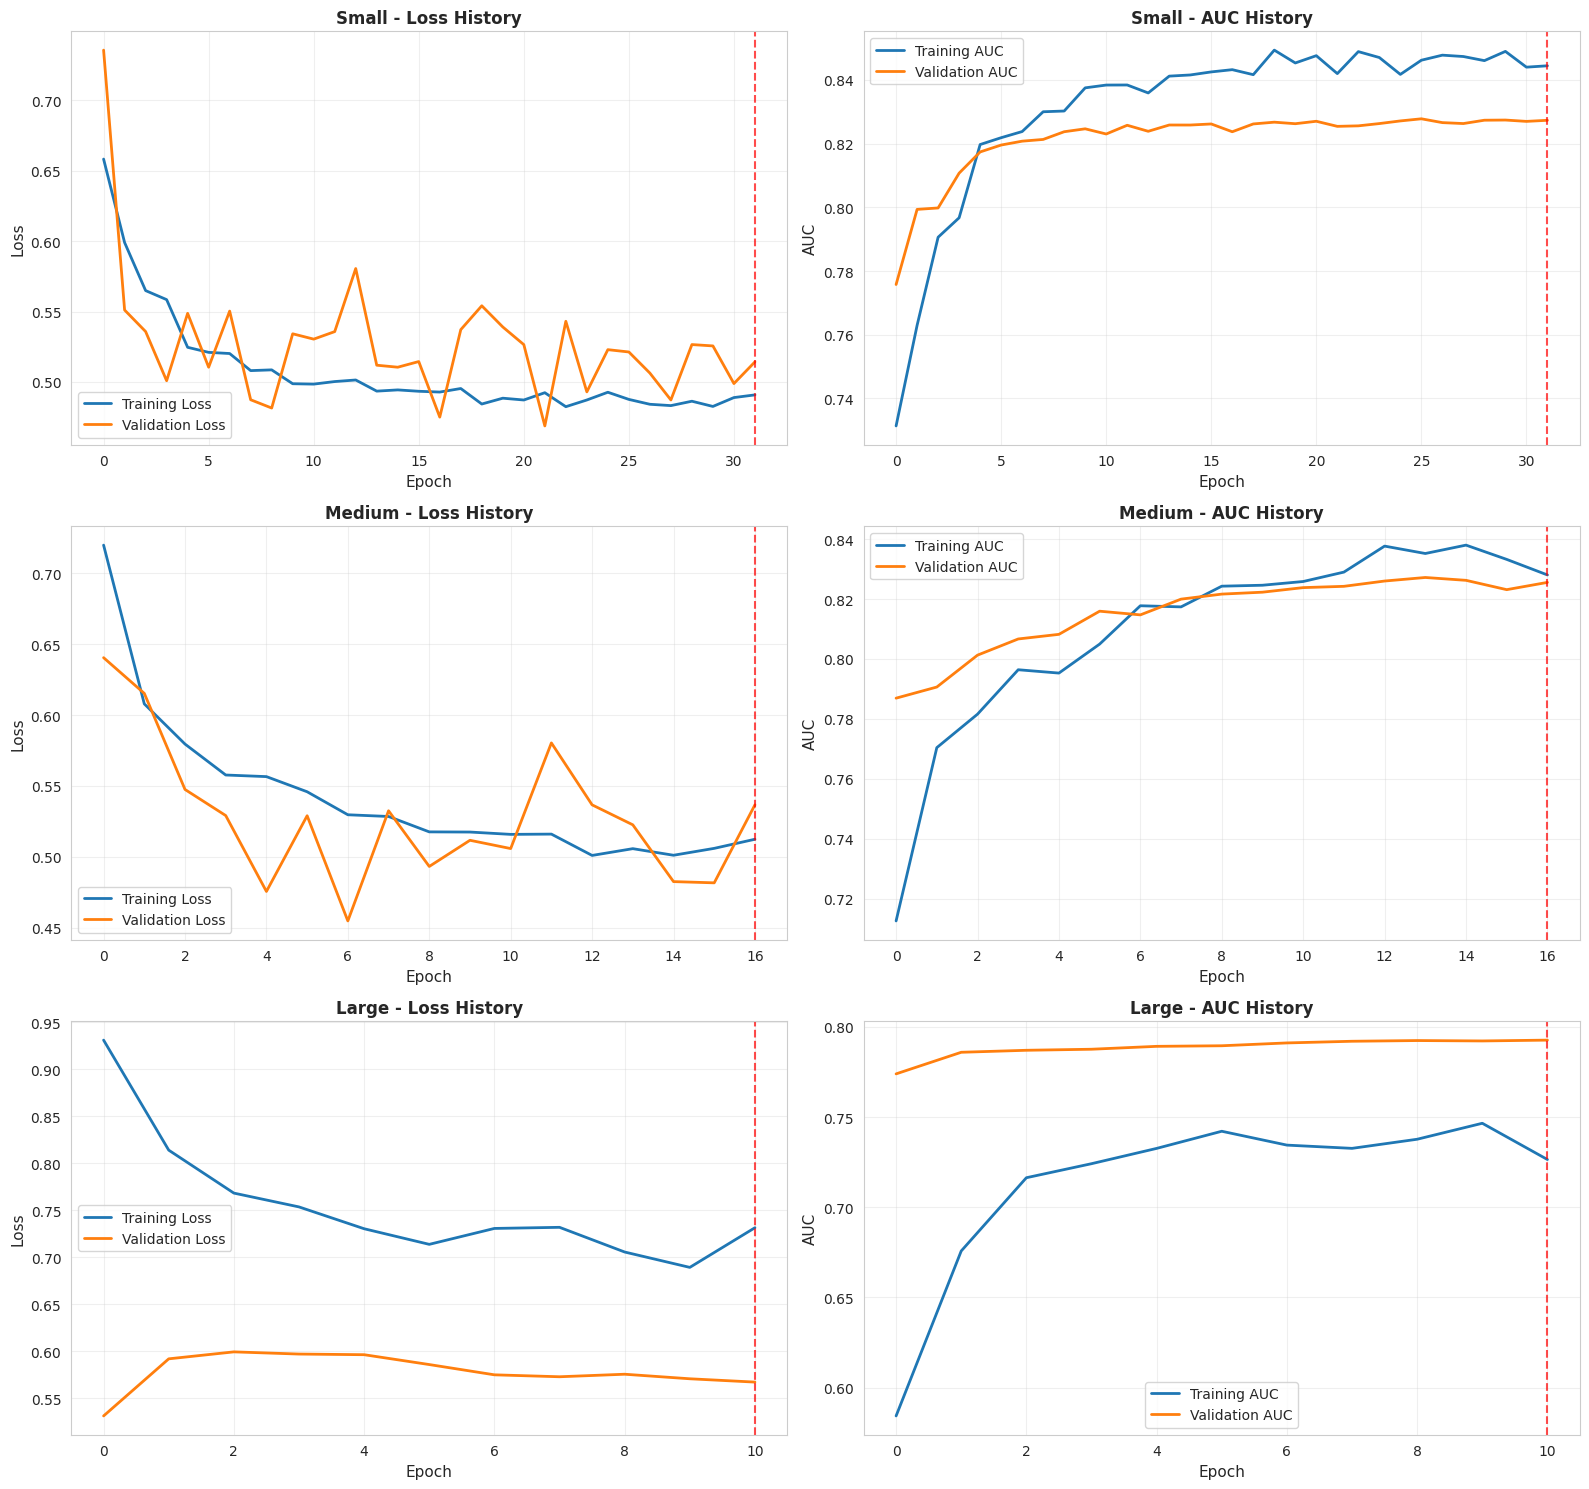

In [ ]:
# 5. VISUALIZE TRAINING HISTORY
print("\n" + "="*60)
print("TRAINING HISTORY VISUALIZATION")
print("="*60)

fig, axes = plt.subplots(len(nn_configs), 2, figsize=(16, 5*len(nn_configs)))

if len(nn_configs) == 1:
    axes = axes.reshape(1, -1)

for idx, (model_name, result) in enumerate(nn_results.items()):
    history = result['history']
    
    # Plot Loss
    axes[idx, 0].plot(history.history['loss'], label='Training Loss', linewidth=2)
    axes[idx, 0].plot(history.history['val_loss'], label='Validation Loss', linewidth=2)
    axes[idx, 0].set_xlabel('Epoch', fontsize=11)
    axes[idx, 0].set_ylabel('Loss', fontsize=11)
    axes[idx, 0].set_title(f'{model_name} - Loss History', fontsize=12, fontweight='bold')
    axes[idx, 0].legend()
    axes[idx, 0].grid(alpha=0.3)
    
    # Mark early stopping point
    epochs_trained = result['epochs_trained']
    axes[idx, 0].axvline(x=epochs_trained-1, color='red', linestyle='--', 
                         label=f'Stopped at epoch {epochs_trained}', alpha=0.7)
    
    # Plot AUC
    axes[idx, 1].plot(history.history['auc'], label='Training AUC', linewidth=2)
    axes[idx, 1].plot(history.history['val_auc'], label='Validation AUC', linewidth=2)
    axes[idx, 1].set_xlabel('Epoch', fontsize=11)
    axes[idx, 1].set_ylabel('AUC', fontsize=11)
    axes[idx, 1].set_title(f'{model_name} - AUC History', fontsize=12, fontweight='bold')
    axes[idx, 1].legend()
    axes[idx, 1].grid(alpha=0.3)
    
    # Mark early stopping point
    axes[idx, 1].axvline(x=epochs_trained-1, color='red', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [ ]:
# 6. COMPARE NEURAL NETWORK MODELS
print("\n" + "="*60)
print("NEURAL NETWORK MODEL COMPARISON")
print("="*60)

nn_comparison = pd.DataFrame({
    name: {
        'Epochs Trained': res['epochs_trained'],
        'Test Loss': res['test_loss'],
        'Accuracy': res['test_accuracy'],
        'Precision': res['test_precision'],
        'Recall': res['test_recall'],
        'F1-Score': res['f1_score'],
        'ROC-AUC': res['roc_auc']
    }
    for name, res in nn_results.items()
}).T

print(nn_comparison.sort_values('ROC-AUC', ascending=False))

# Find best model
best_nn_name = nn_comparison.sort_values('ROC-AUC', ascending=False).index[0]
print(f"\nBest Neural Network: {best_nn_name}")
print(f"  ROC-AUC: {nn_results[best_nn_name]['roc_auc']:.4f}")


NEURAL NETWORK MODEL COMPARISON
        Epochs Trained  Test Loss  Accuracy  Precision    Recall  F1-Score  \
Small             32.0   0.444735  0.774308   0.557143  0.729947  0.631944   
Medium            17.0   0.432624  0.796309   0.617886  0.609626  0.613728   
Large             11.0   0.507864  0.701916   0.463492  0.780749  0.581673   

         ROC-AUC  
Small   0.848544  
Medium  0.839526  
Large   0.803741  

Best Neural Network: Small
  ROC-AUC: 0.8485



NEURAL NETWORK CONFUSION MATRICES


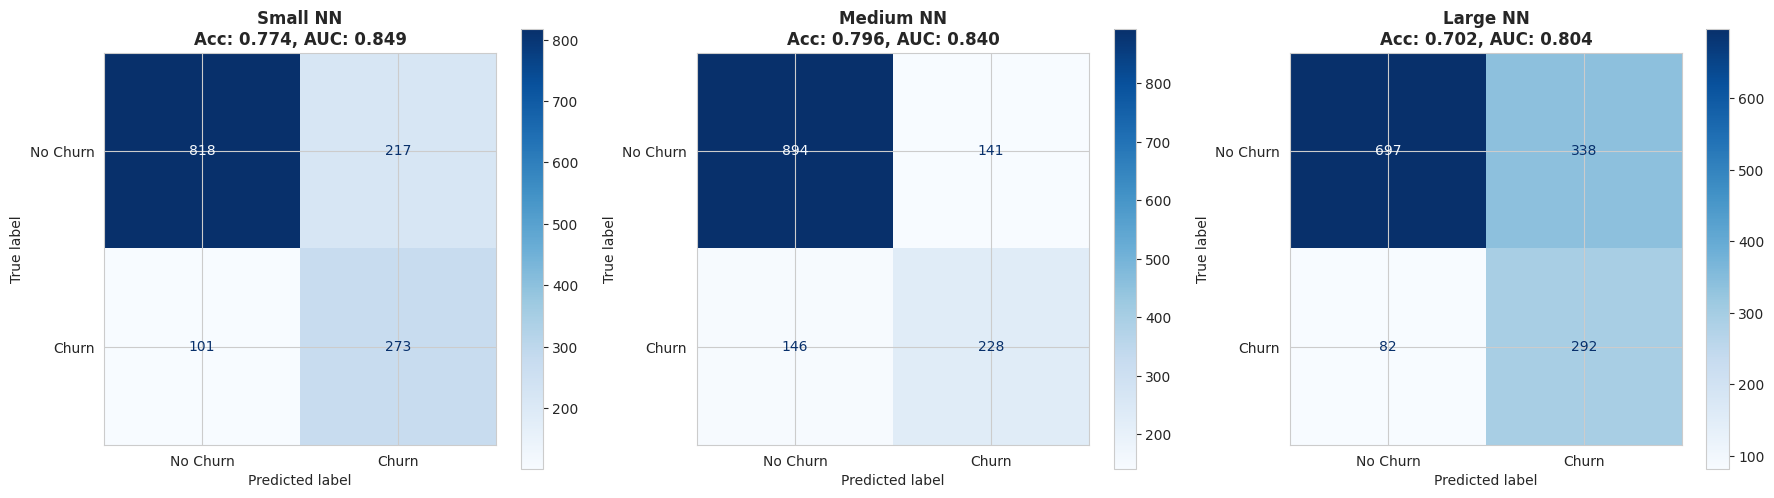

In [ ]:
# 7. NEURAL NETWORK CONFUSION MATRICES
print("\n" + "="*60)
print("NEURAL NETWORK CONFUSION MATRICES")
print("="*60)

fig, axes = plt.subplots(1, len(nn_configs), figsize=(6*len(nn_configs), 5))

if len(nn_configs) == 1:
    axes = [axes]

for idx, (model_name, result) in enumerate(nn_results.items()):
    cm = confusion_matrix(y_test, result['y_pred'])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Churn', 'Churn'])
    disp.plot(ax=axes[idx], cmap='Blues', values_format='d')
    axes[idx].set_title(f'{model_name} NN\nAcc: {result["test_accuracy"]:.3f}, AUC: {result["roc_auc"]:.3f}',
                       fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()


NEURAL NETWORKS vs TRADITIONAL MODELS
                    Accuracy  Precision    Recall  F1-Score   ROC-AUC
NN_Small            0.774308   0.557143  0.729947  0.631944  0.848544
XGBoost             0.744500   0.511986  0.799465  0.624217  0.847387
LogisticRegression  0.736693   0.502530  0.796791  0.616339  0.846788
RandomForest        0.766501   0.543689  0.748663  0.629921  0.842521
GradientBoosting    0.797729   0.653979  0.505348  0.570136  0.841396
NN_Medium           0.796309   0.617886  0.609626  0.613728  0.839526
NN_Large            0.701916   0.463492  0.780749  0.581673  0.803741


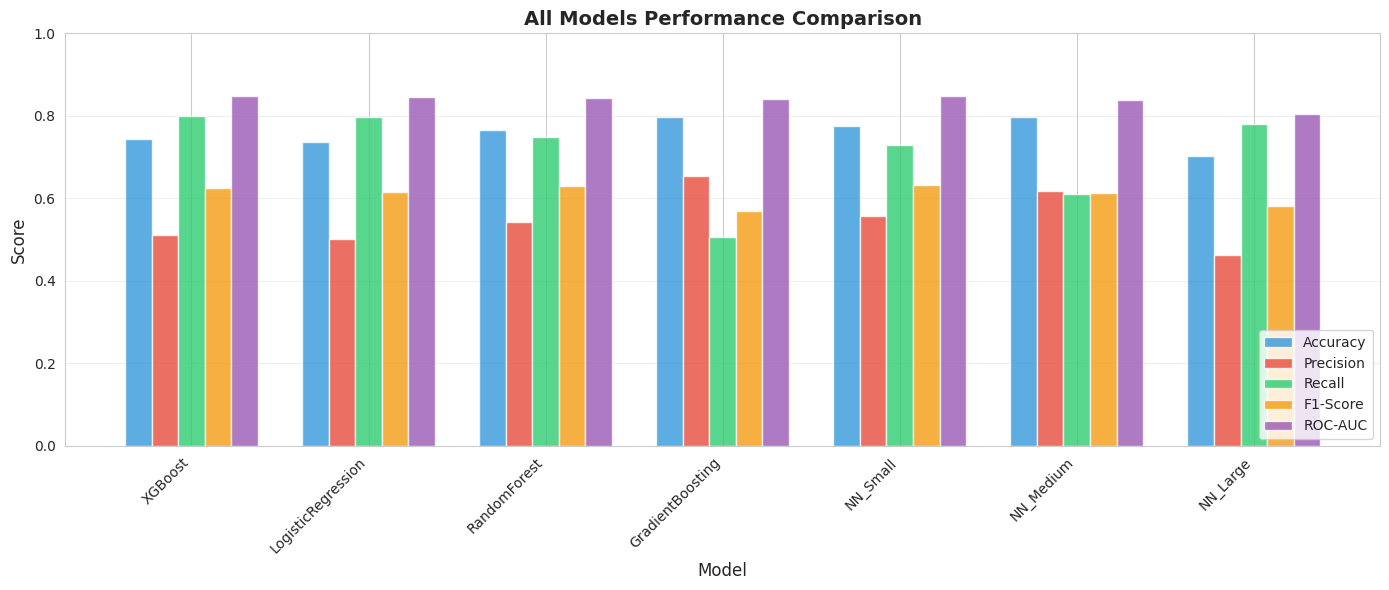


OVERALL BEST MODEL

Best Overall Model: NN_Small
Metrics:
Accuracy     0.774308
Precision    0.557143
Recall       0.729947
F1-Score     0.631944
ROC-AUC      0.848544
Name: NN_Small, dtype: float64


In [ ]:
# 8. COMPARE NEURAL NETWORKS WITH TRADITIONAL MODELS
print("\n" + "="*60)
print("NEURAL NETWORKS vs TRADITIONAL MODELS")
print("="*60)

# Combine results
all_models_comparison = results_df.copy()

# Add neural network results
for name, res in nn_results.items():
    all_models_comparison.loc[f'NN_{name}'] = {
        'Accuracy': res['test_accuracy'],
        'Precision': res['test_precision'],
        'Recall': res['test_recall'],
        'F1-Score': res['f1_score'],
        'ROC-AUC': res['roc_auc']
    }

print(all_models_comparison.sort_values('ROC-AUC', ascending=False))

# Visualization
fig, ax = plt.subplots(figsize=(14, 6))

models = all_models_comparison.index
x = np.arange(len(models))
width = 0.15

metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']
colors = ['#3498db', '#e74c3c', '#2ecc71', '#f39c12', '#9b59b6']

for i, metric in enumerate(metrics):
    ax.bar(x + i*width, all_models_comparison[metric], width, 
           label=metric, color=colors[i], alpha=0.8)

ax.set_xlabel('Model', fontsize=12)
ax.set_ylabel('Score', fontsize=12)
ax.set_title('All Models Performance Comparison', fontsize=14, fontweight='bold')
ax.set_xticks(x + width * 2)
ax.set_xticklabels(models, rotation=45, ha='right')
ax.legend(loc='lower right', fontsize=10)
ax.grid(axis='y', alpha=0.3)
ax.set_ylim([0, 1])

plt.tight_layout()
plt.show()

print("\n" + "="*60)
print("OVERALL BEST MODEL")
print("="*60)
overall_best = all_models_comparison.sort_values('ROC-AUC', ascending=False).index[0]
print(f"\nBest Overall Model: {overall_best}")
print(f"Metrics:")
print(all_models_comparison.loc[overall_best])